In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data_path = "forecasting_case_study.xlsx"
sales_data = pd.read_excel(data_path)
sales_data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [3]:
sales_data.shape

(1218, 12)

In [4]:
sales_data.duplicated().sum()

0

In [5]:
sales_data.isna().sum()

,0
Product,0
date,0
Sales,0
Price Discount (%),0
In-Store Promo,0
Catalogue Promo,0
Store End Promo,0
Google_Mobility,0
Covid_Flag,0
V_DAY,0


First we check wheter there is any replicate rows or any NA values in the dataframe, and the result shows that there is none.

In [6]:
for col in sales_data.iloc[:, 4:]:
    print(col, ":", sales_data[col].unique())

In-Store Promo : [0 1]
Catalogue Promo : [0 1]
Store End Promo : [0 1]
Google_Mobility : [  0.     2.36   3.3    3.9    3.81   3.01   0.26 -15.7  -26.63 -28.49
 -27.3  -24.28 -22.58 -18.18 -15.91 -15.27 -13.24 -10.86 -10.13  -8.68
  -8.57  -7.5   -8.04  -9.36  -8.77  -9.93 -11.65 -13.23 -20.35 -19.41
 -18.83 -16.44  -7.28  -9.87  -7.79  -9.73  -7.39  -7.56  -8.39  -7.43
  -5.95  -7.2   -5.96  -5.3   -4.38  -4.74 -10.27  -6.95]
Covid_Flag : [0 1]
V_DAY : [0 1]
EASTER : [0 1]
CHRISTMAS : [0 1]


Then we check the values for the non-obvious columns to see whether they are categorical variables or numerical variable. For numerical variables, we can look for outliers and skewness. From above unique values in each row, we can see that only `Google_Mobility` (together with `Sales` and `Price Discount` which are ovbiously numerical) is numerical, and all other variables are categorical.

SKU1 - Sales
10     108159
46     155253
96     109917
98     174994
115    119393
139    106885
150    258874
151    124261
Name: Sales, dtype: int64


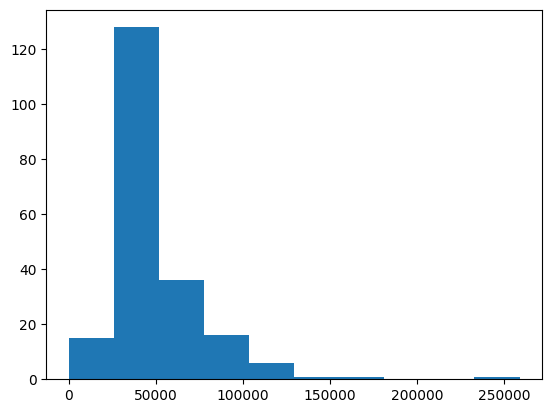

SKU1 - Price Discount (%)
10     0.44
32     0.44
34     0.44
39     0.44
57     0.44
70     0.44
84     0.44
91     0.44
96     0.44
115    0.44
122    0.44
139    0.44
150    0.44
151    0.44
172    0.45
188    0.44
Name: Price Discount (%), dtype: float64


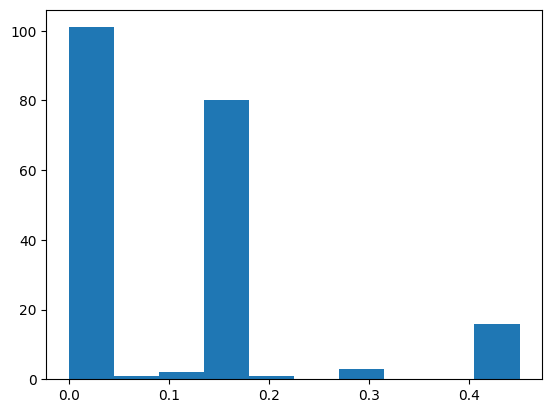

SKU1 - Google_Mobility
163   -15.70
164   -26.63
165   -28.49
166   -27.30
167   -24.28
168   -22.58
169   -18.18
170   -15.91
171   -15.27
184   -20.35
185   -19.41
186   -18.83
187   -16.44
Name: Google_Mobility, dtype: float64


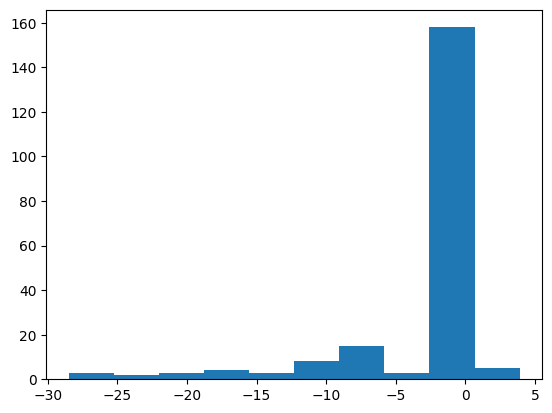

SKU2 - Sales
210    41915
219    52122
224    33566
242    40527
257    32549
270    41316
276    42002
291    32900
322    36674
328    37065
344    40111
350    39870
359    30409
388    34327
396    40169
Name: Sales, dtype: int64


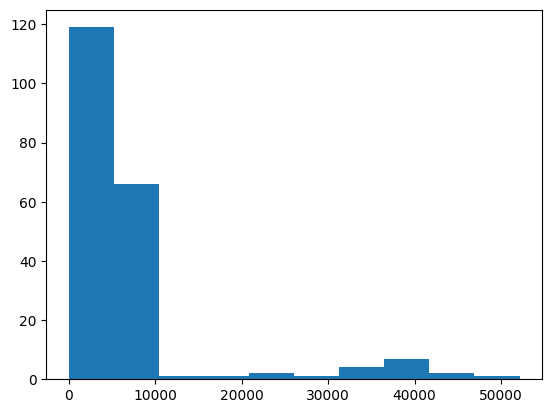

SKU2 - Price Discount (%)
210    0.5
219    0.5
224    0.5
242    0.5
257    0.5
265    0.5
270    0.5
276    0.5
291    0.5
311    0.5
322    0.5
328    0.5
344    0.5
350    0.5
359    0.5
388    0.5
396    0.5
400    0.5
Name: Price Discount (%), dtype: float64


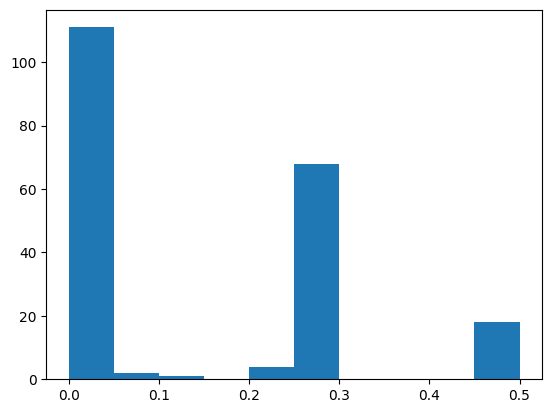

SKU2 - Google_Mobility
367   -15.70
368   -26.63
369   -28.49
370   -27.30
371   -24.28
372   -22.58
373   -18.18
374   -15.91
375   -15.27
388   -20.35
389   -19.41
390   -18.83
391   -16.44
Name: Google_Mobility, dtype: float64


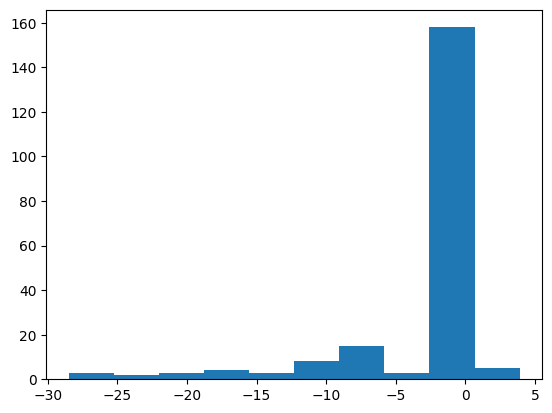

SKU3 - Sales
421    212245
426    248373
437    236242
447    212947
478    288322
494    237462
514    195088
530    197503
540    224723
546    207356
552    182891
566    187548
588    184365
592    189965
Name: Sales, dtype: int64


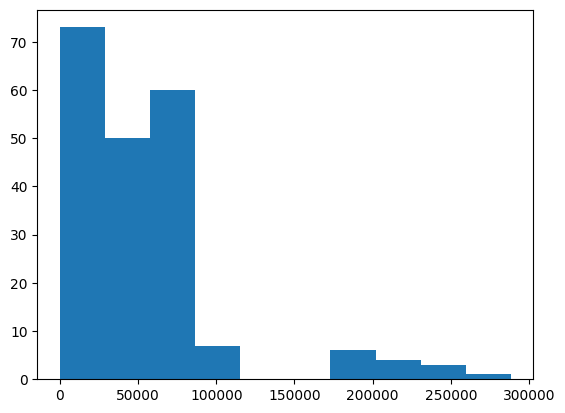

SKU3 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


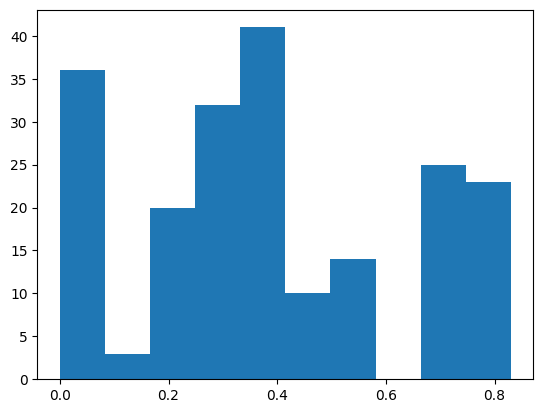

SKU3 - Google_Mobility
571   -15.70
572   -26.63
573   -28.49
574   -27.30
575   -24.28
576   -22.58
577   -18.18
578   -15.91
579   -15.27
592   -20.35
593   -19.41
594   -18.83
595   -16.44
Name: Google_Mobility, dtype: float64


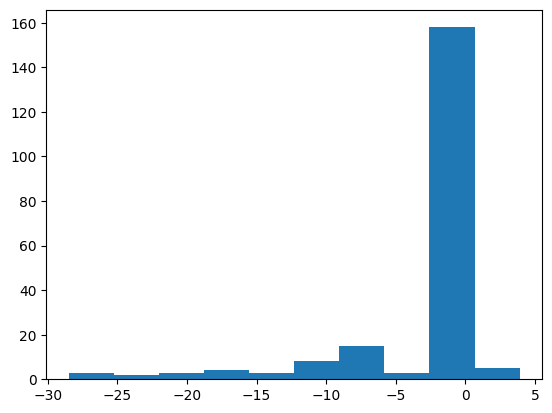

SKU4 - Sales
625    65464
630    63256
641    75377
651    69467
682    72261
698    66114
718    63842
734    59637
744    64115
750    56430
756    54996
770    58091
792    76346
796    81301
Name: Sales, dtype: int64


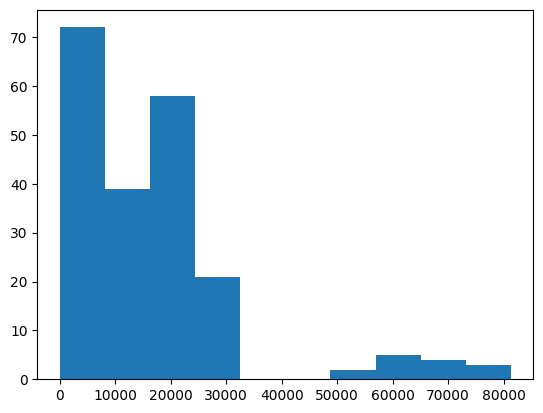

SKU4 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


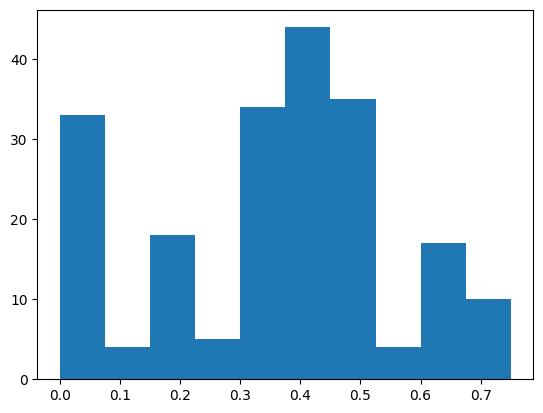

SKU4 - Google_Mobility
775   -15.70
776   -26.63
777   -28.49
778   -27.30
779   -24.28
780   -22.58
781   -18.18
782   -15.91
783   -15.27
796   -20.35
797   -19.41
798   -18.83
799   -16.44
Name: Google_Mobility, dtype: float64


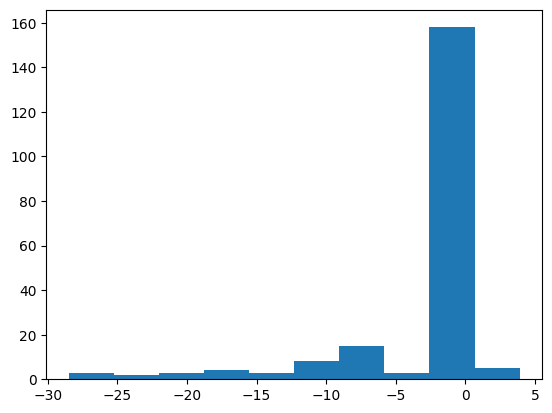

SKU5 - Sales
838    55905
844    73114
849    55567
856    50485
866    51114
885    55160
889    56275
934    47061
938    57064
941    61658
947    63644
952    56807
956    57496
987    61753
996    73058
Name: Sales, dtype: int64


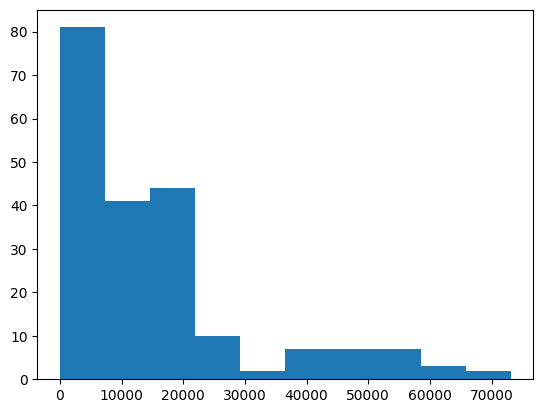

SKU5 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


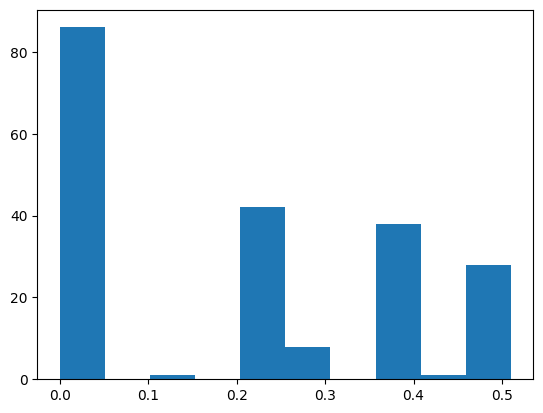

SKU5 - Google_Mobility
979    -15.70
980    -26.63
981    -28.49
982    -27.30
983    -24.28
984    -22.58
985    -18.18
986    -15.91
987    -15.27
1000   -20.35
1001   -19.41
1002   -18.83
1003   -16.44
Name: Google_Mobility, dtype: float64


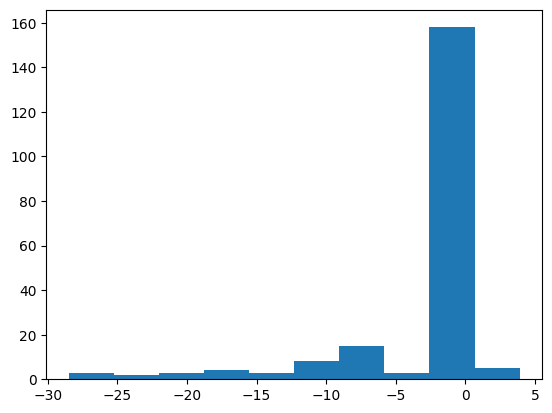

SKU6 - Sales
1025    118504
1037    142953
1041    131072
1046    118276
1053    129254
1057    154098
1058    241114
1089    128647
1105    127468
1109    140995
1110    181833
1161    138789
1162    143887
1163    163536
1214    115798
1215    152186
Name: Sales, dtype: int64


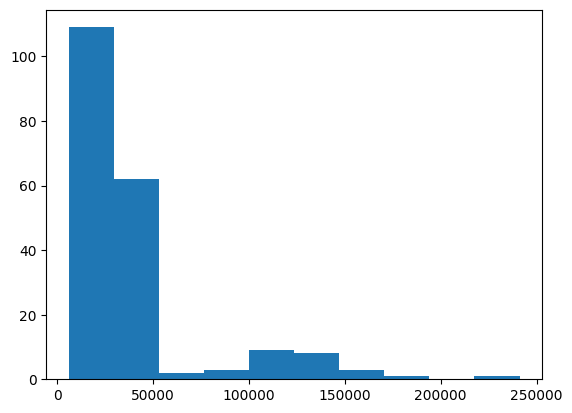

SKU6 - Price Discount (%)
1173    0.69
1175    0.69
1177    0.69
1179    0.69
1181    0.69
1183    0.69
Name: Price Discount (%), dtype: float64


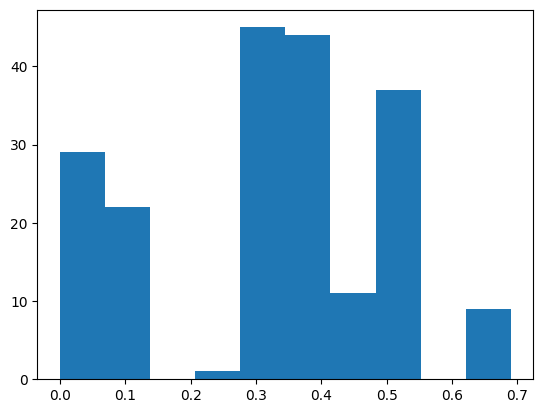

SKU6 - Google_Mobility
1183   -15.70
1184   -26.63
1185   -28.49
1186   -27.30
1187   -24.28
1188   -22.58
1189   -18.18
1190   -15.91
1191   -15.27
1204   -20.35
1205   -19.41
1206   -18.83
1207   -16.44
Name: Google_Mobility, dtype: float64


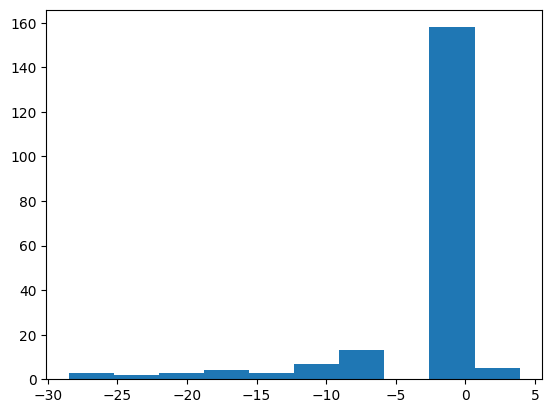

In [7]:
for i in range(1, 7):
    product = "SKU" + str(i)
    product_data = sales_data[sales_data["Product"] == product]
    for col in ["Sales", "Price Discount (%)", "Google_Mobility"]:
        col_data = product_data[col]
        z_scores = np.abs(stats.zscore(col_data.dropna()))
        outliers = np.where(z_scores > 2)[0]  # outliers have z-score > 2
        print(product, "-", col)
        print(product_data.iloc[outliers][col])
        plt.hist(col_data)
        plt.show()

We can see that for all products, `Sales` is right skewed and `Google_Mobility` is left skewed, while `Price Discount (%)` is more randomly scattered. There are some outliers in each category. We believe that since discount is scattered everwhere, and a lot of the outliers are actually the same value, so they are not truely outliers, but just the nature of the data. Therefore, we will not remove those. While for the other two columns, I believe we need to farther investigate into the patterns of the data before deciding whether they are turely outliers. If there are true outliers, we would want to replace with mean of the column. This is because each data point is important in analyzing the trends and we cannot simply remove columns with outliers.

In [8]:
sales_data.describe()

,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,2019-01-13 02:04:08.275862016,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
min,2017-02-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,2018-01-21 00:00:00,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-01-13 00:00:00,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-01-05 00:00:00,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-12-27 00:00:00,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000
std,NaN,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169


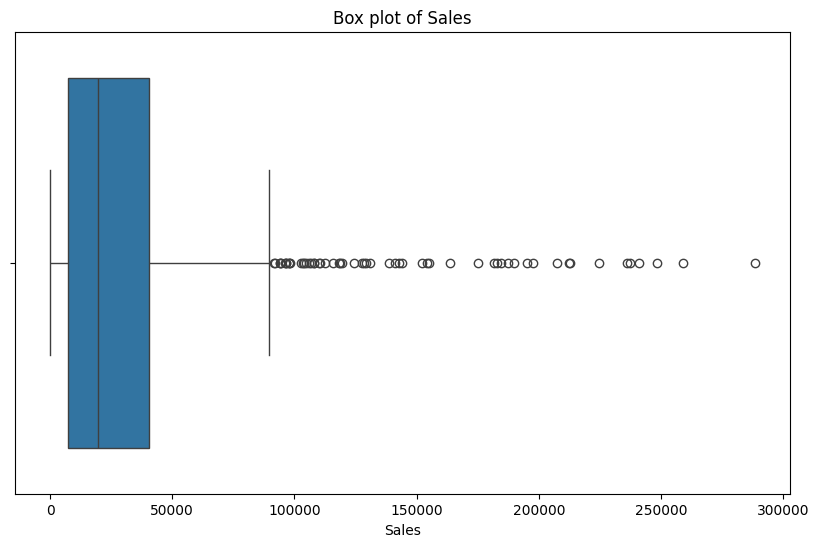

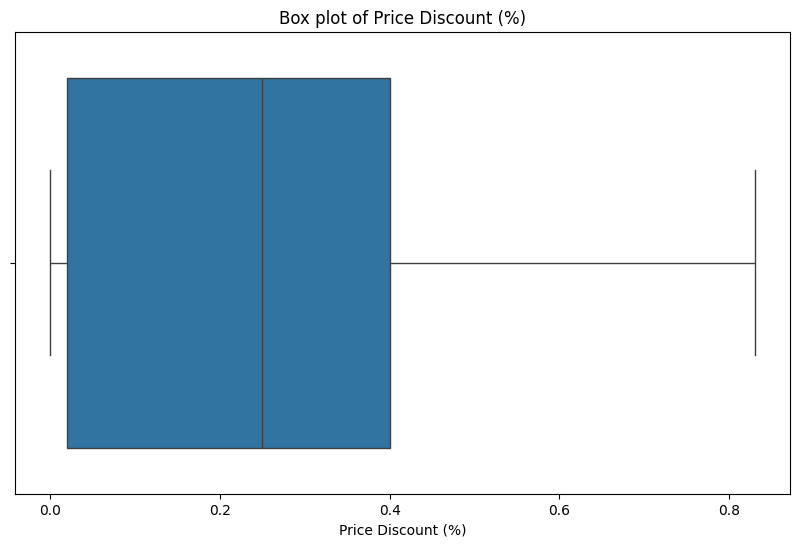

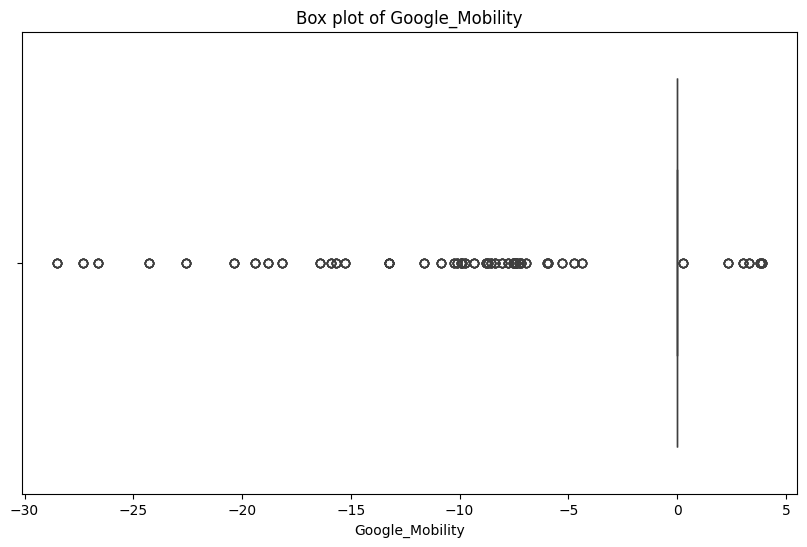

In [9]:
import seaborn as sns
# Plot distributions for numeric columns to visualize outliers
numeric_columns = ['Sales', 'Price Discount (%)', 'Google_Mobility']

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sales_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [15]:
print("Number of duplicate dates in original data:", sales_data['date'].duplicated().sum())


Number of duplicate dates in original data: 1014


In [10]:
sales_data_df= sales_data['date'].duplicated()
sales_data_df

,date
0,False
1,False
2,False
3,False
4,False
...,...
1213,True
1214,True
1215,True
1216,True


The date column has duplicated rows but those are basically repeated because of different product sold in the same days. So we will not change those duplicated rows.

Outliers using Z-Score method:
      Product       date   Sales  Price Discount (%)  In-Store Promo  \
46      SKU1 2017-12-24  155253                0.17               1   
98      SKU1 2018-12-23  174994                0.28               1   
150     SKU1 2019-12-22  258874                0.44               0   
421     SKU3 2017-05-07  212245                0.50               1   
426     SKU3 2017-06-11  248373                0.50               1   
437     SKU3 2017-08-27  236242                0.50               1   
447     SKU3 2017-11-05  212947                0.50               1   
478     SKU3 2018-06-10  288322                0.50               1   
494     SKU3 2018-09-30  237462                0.50               1   
514     SKU3 2019-02-17  195088                0.50               1   
530     SKU3 2019-06-09  197503                0.55               1   
540     SKU3 2019-08-18  224723                0.52               1   
546     SKU3 2019-09-29  207356              

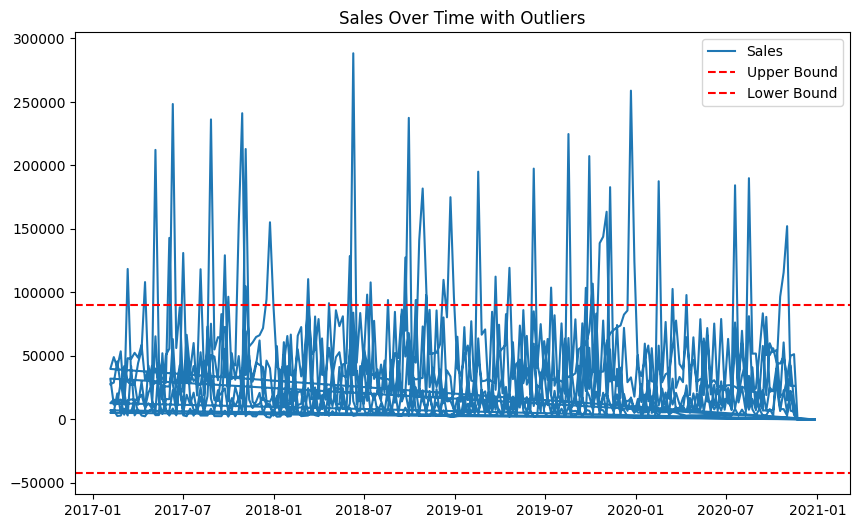

In [11]:
# Z-Score Method to detect outliers in Sales
sales_data['Sales_Zscore'] = (sales_data['Sales'] - sales_data['Sales'].mean()) / sales_data['Sales'].std()
outliers = sales_data[abs(sales_data['Sales_Zscore']) > 3]
print("Outliers using Z-Score method:\n", outliers)

# IQR Method to detect outliers in Sales
Q1 = sales_data['Sales'].quantile(0.25)
Q3 = sales_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = sales_data[(sales_data['Sales'] < lower_bound) | (sales_data['Sales'] > upper_bound)]
print("Outliers using IQR method:\n", outliers_iqr)

# Visualize Sales to identify outliers
plt.figure(figsize=(10, 6))
plt.plot(sales_data['date'], sales_data['Sales'], label='Sales')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.title('Sales Over Time with Outliers')
plt.legend()
plt.show()


The majority of potential outliers are large spikes in sales. These spikes could be caused by factors like promotions, holidays, or other events leading to increased sales.
The Z-Score and IQR methods are both detecting these positive sales spikes as outliers.These spikes may not be "errors" in the data but could instead represent meaningful events (e.g., successful promotions, holiday seasons).

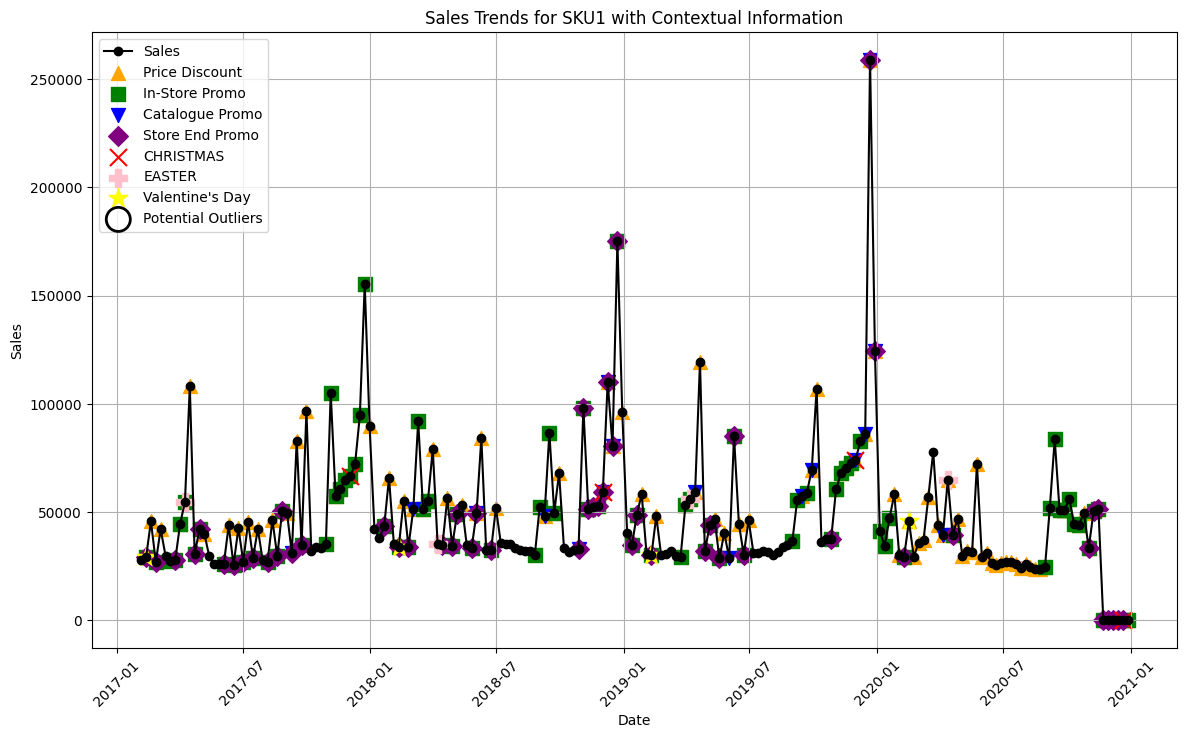

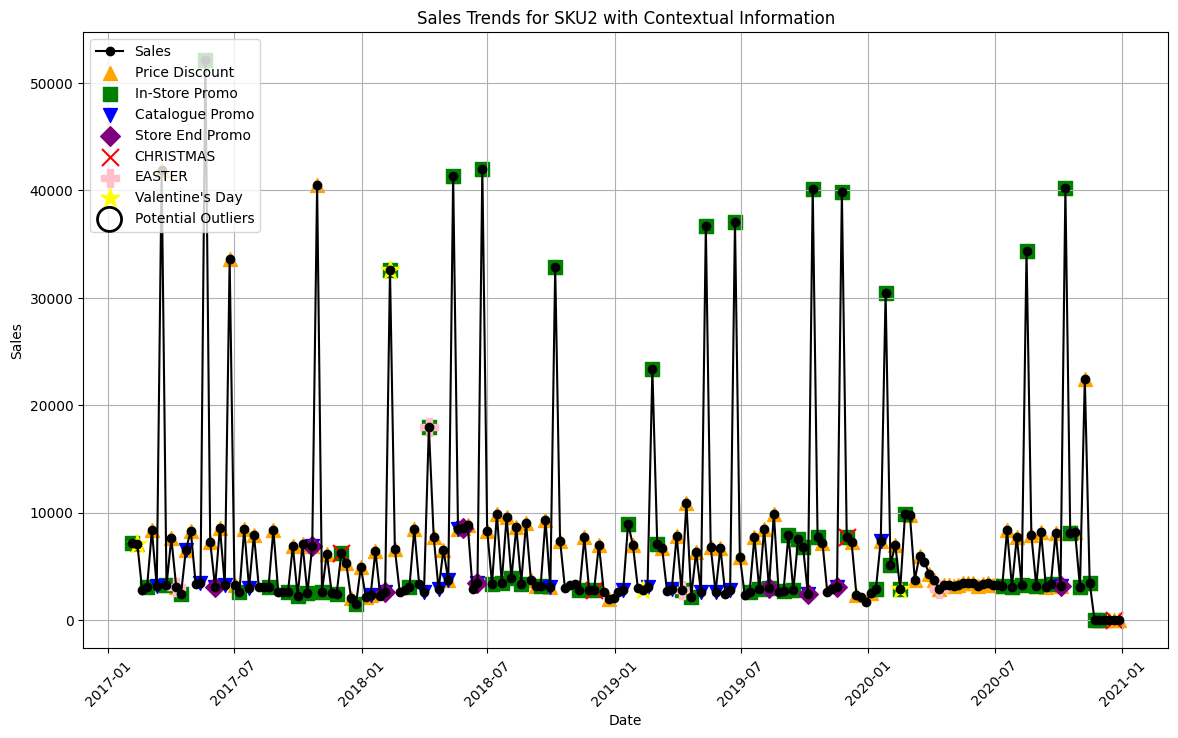

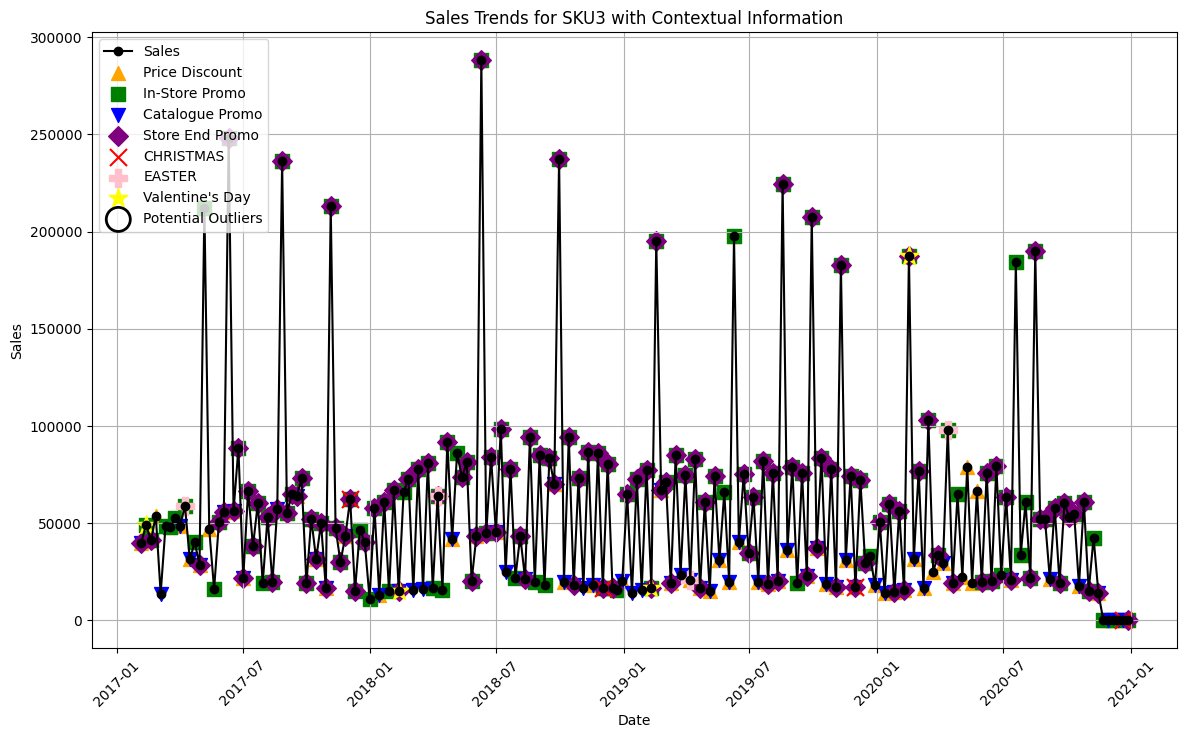

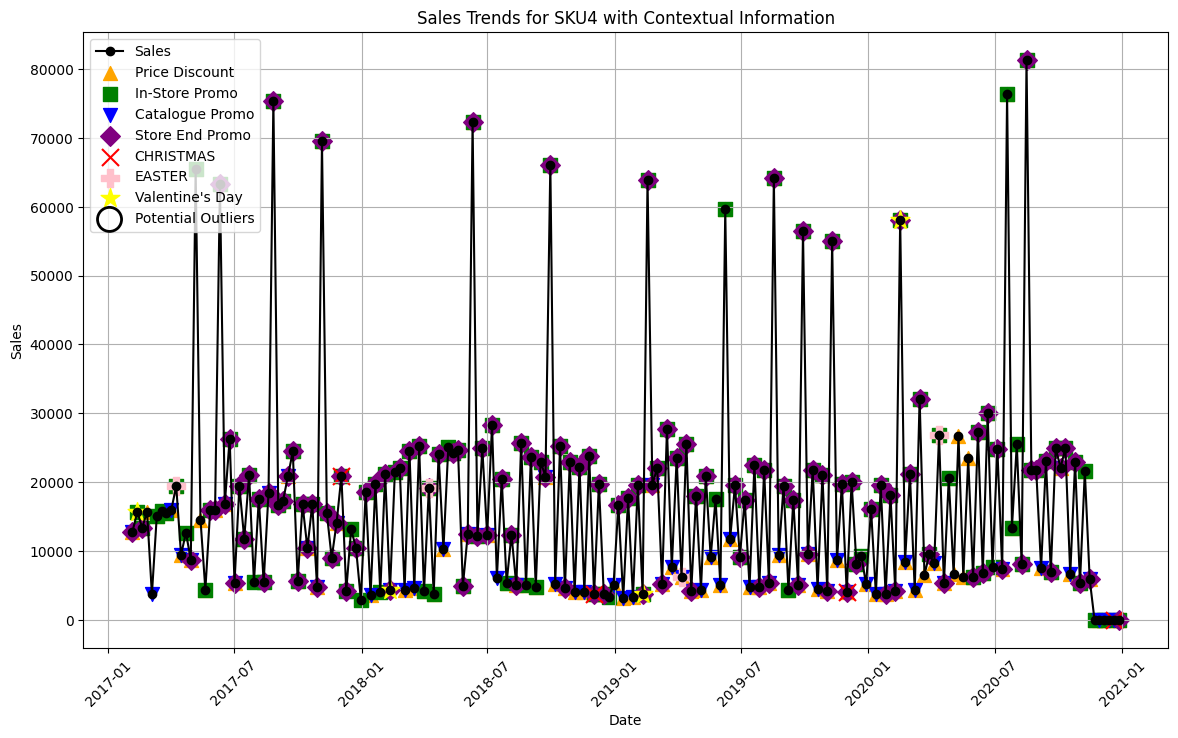

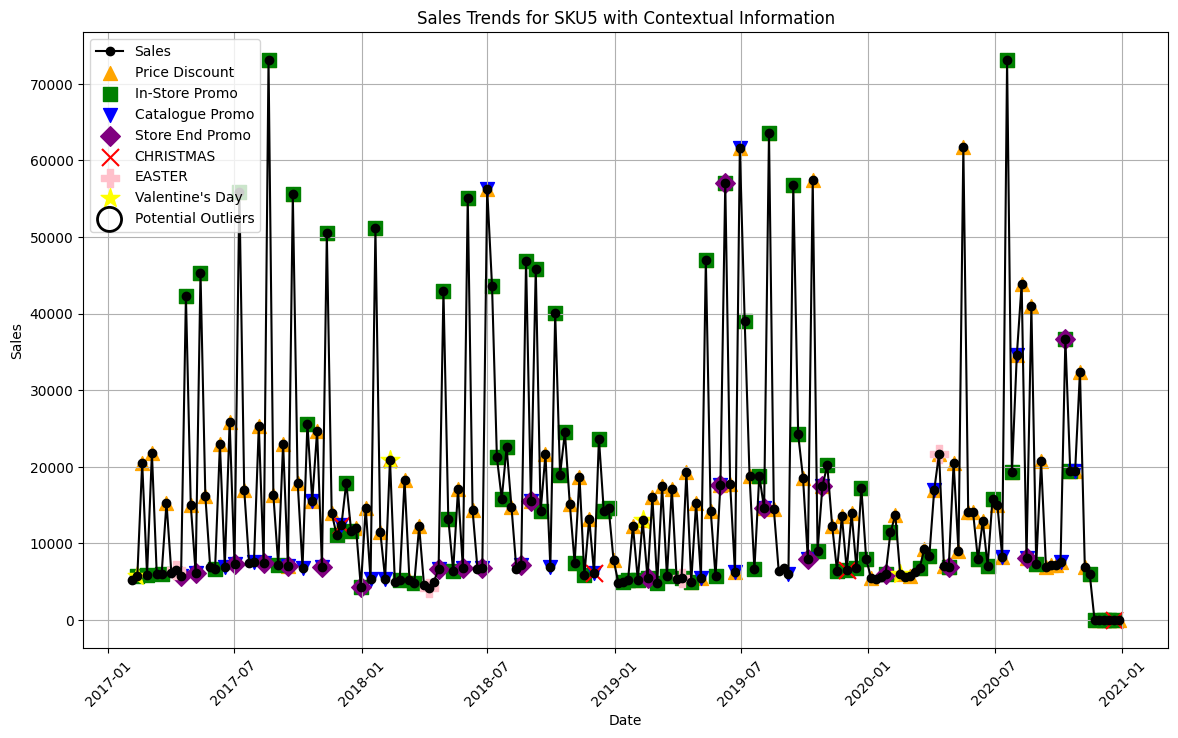

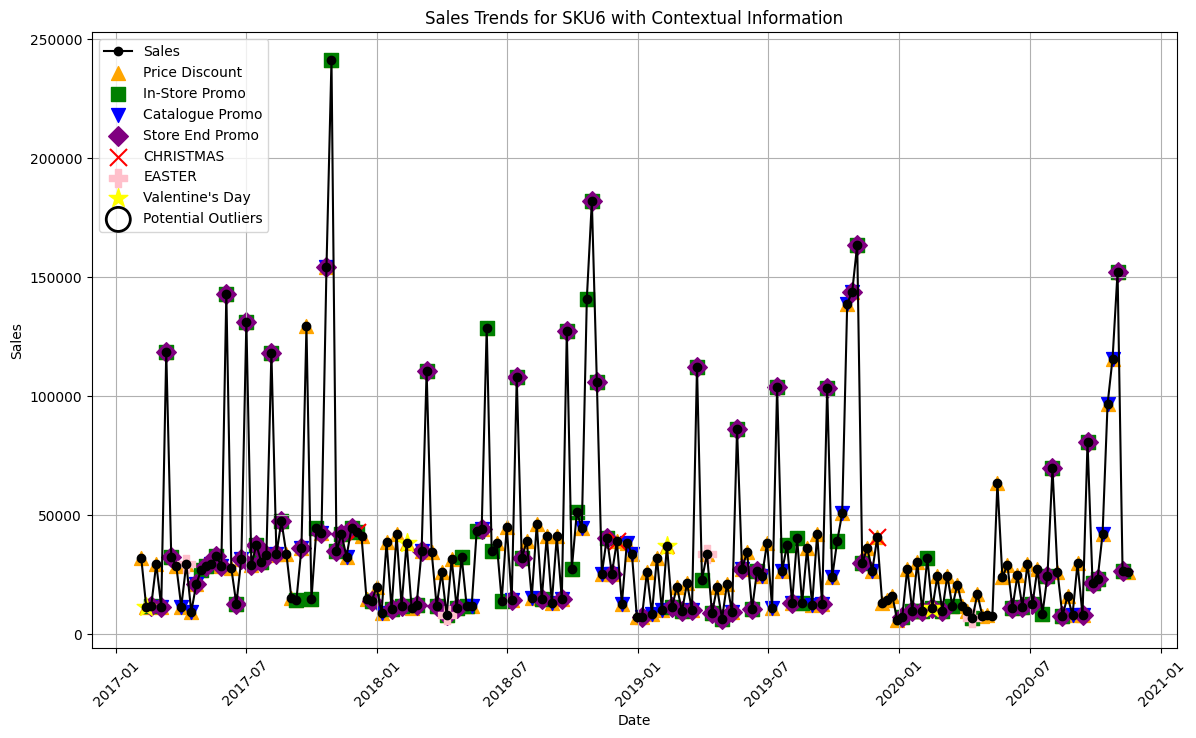

In [12]:
import seaborn as sns
def plot_sales_with_context(df, sku):
    # Filter data for the given SKU
    sku_data = df[df['Product'] == sku].copy()

    # Plot Sales over Time
    plt.figure(figsize=(14, 8))
    plt.plot(sku_data['date'], sku_data['Sales'], label='Sales', marker='o', linestyle='-', color='black')

    # Plot contextual information with different markers and colors
    plt.scatter(sku_data[sku_data['Price Discount (%)'] > 0]['date'],
                sku_data[sku_data['Price Discount (%)'] > 0]['Sales'],
                color='orange', marker='^', s=100, label='Price Discount')

    plt.scatter(sku_data[sku_data['In-Store Promo'] == 1]['date'],
                sku_data[sku_data['In-Store Promo'] == 1]['Sales'],
                color='green', marker='s', s=100, label='In-Store Promo')

    plt.scatter(sku_data[sku_data['Catalogue Promo'] == 1]['date'],
                sku_data[sku_data['Catalogue Promo'] == 1]['Sales'],
                color='blue', marker='v', s=100, label='Catalogue Promo')

    plt.scatter(sku_data[sku_data['Store End Promo'] == 1]['date'],
                sku_data[sku_data['Store End Promo'] == 1]['Sales'],
                color='purple', marker='D', s=100, label='Store End Promo')

    plt.scatter(sku_data[sku_data['CHRISTMAS'] == 1]['date'],
                sku_data[sku_data['CHRISTMAS'] == 1]['Sales'],
                color='red', marker='x', s=150, label='CHRISTMAS')

    plt.scatter(sku_data[sku_data['EASTER'] == 1]['date'],
                sku_data[sku_data['EASTER'] == 1]['Sales'],
                color='pink', marker='P', s=150, label='EASTER')

    plt.scatter(sku_data[sku_data['V_DAY'] == 1]['date'],
                sku_data[sku_data['V_DAY'] == 1]['Sales'],
                color='yellow', marker='*', s=200, label='Valentine\'s Day')

    # Highlight outliers in Sales that don't align with promotions
    outliers = sku_data[sku_data['Sales'].isin(outliers_iqr)] # Example outliers
    plt.scatter(outliers['date'], outliers['Sales'],
                edgecolor='black', facecolor='none', linewidth=2, s=300, marker='o', label='Potential Outliers')
    # Plot settings
    plt.title(f'Sales Trends for {sku} with Contextual Information')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
# Repeat for other SKUs if needed
for sku in sales_data['Product'].unique():
    plot_sales_with_context(sales_data, sku)

The visualization gives us to visibily inspect and cross-reference sales spikes/drops with promotions, holidays, and discounts. Periods where sales spikes or drops without any promotional or holiday context could be due to data entry errors. But we find specific periods where spikes are present because of promotion and holidays which indicates high sales. So they are important data point for us. We can't see any spikes which may not cause by any holidays or promotion result in any potential outliers. So we can't consider those skewness as outliers or data error.

In [13]:
correlations = sales_data[['Google_Mobility', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS',
                           'In-Store Promo', 'Catalogue Promo', 'Store End Promo']].corr()
print(correlations['Google_Mobility'])


Google_Mobility    1.000000
Covid_Flag        -0.756752
V_DAY              0.078227
EASTER            -0.108645
CHRISTMAS          0.003461
In-Store Promo     0.056074
Catalogue Promo    0.073260
Store End Promo    0.084955
Name: Google_Mobility, dtype: float64


In [14]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(sales_data[['Google_Mobility']])
sales_data['z_scores'] = z_scores

# Filter outliers
outliers = sales_data[abs(sales_data['z_scores']) > 3]
print(outliers[['Google_Mobility', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS',
                'In-Store Promo', 'Catalogue Promo', 'Store End Promo']])


      Google_Mobility  Covid_Flag  V_DAY  EASTER  CHRISTMAS  In-Store Promo  \
164            -26.63           1      0       0          0               0   
165            -28.49           1      0       0          0               0   
166            -27.30           1      0       1          0               0   
167            -24.28           1      0       0          0               1   
168            -22.58           1      0       0          0               0   
184            -20.35           1      0       0          0               0   
368            -26.63           1      0       0          0               0   
369            -28.49           1      0       0          0               0   
370            -27.30           1      0       1          0               0   
371            -24.28           1      0       0          0               0   
372            -22.58           1      0       0          0               0   
388            -20.35           1      0       0    

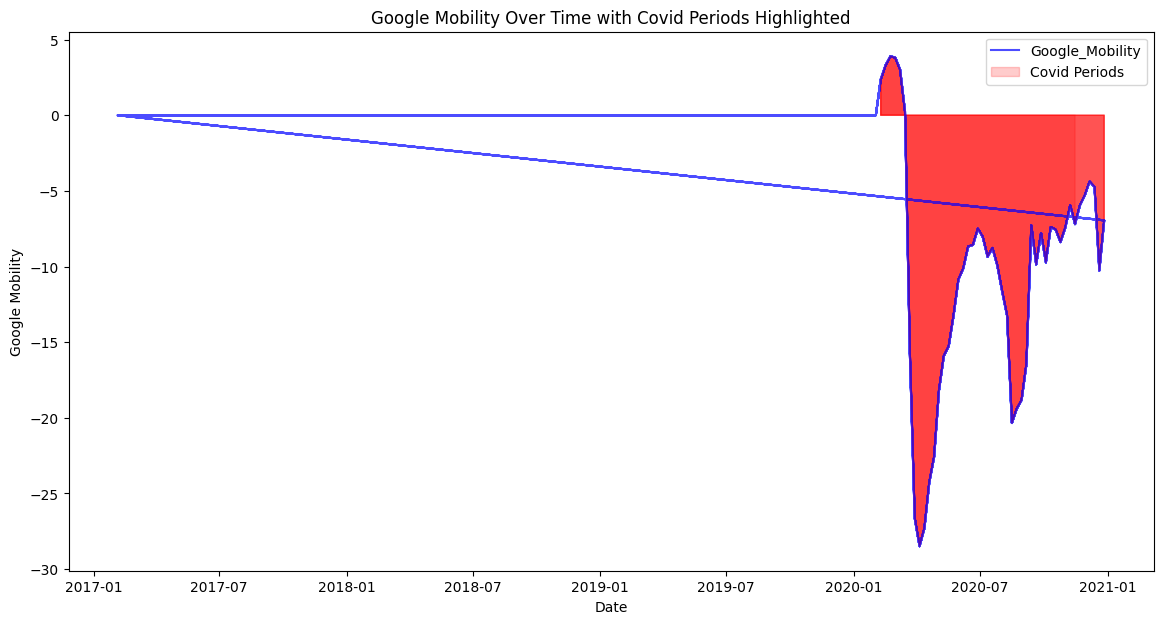

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the time series of Google Mobility with Covid_Flag
plt.figure(figsize=(14, 7))
plt.plot(sales_data['date'], sales_data['Google_Mobility'], label='Google_Mobility', color='blue', alpha=0.7)

# Highlight periods with Covid_Flag
plt.fill_between(sales_data['date'],
                 sales_data['Google_Mobility'],
                 where=sales_data['Covid_Flag'] == 1,
                 color='red', alpha=0.2, label='Covid Periods')

plt.title('Google Mobility Over Time with Covid Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Google Mobility')
plt.legend()
plt.show()


<ipython-input-16-a62ac3c3c6d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Covid_Flag', y='Google_Mobility', data=sales_data, palette='Set2')


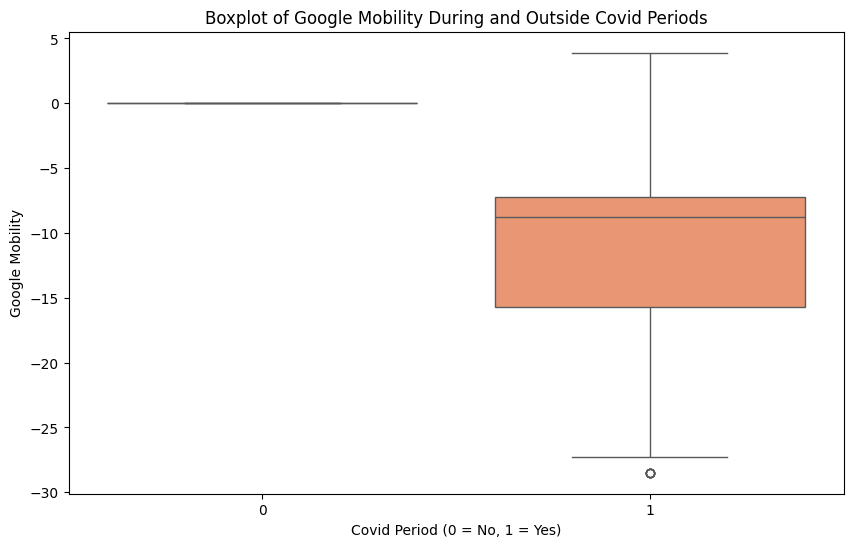

In [16]:
# Creating a boxplot to compare Google Mobility during and outside Covid periods
plt.figure(figsize=(10, 6))
sns.boxplot(x='Covid_Flag', y='Google_Mobility', data=sales_data, palette='Set2')
plt.title('Boxplot of Google Mobility During and Outside Covid Periods')
plt.xlabel('Covid Period (0 = No, 1 = Yes)')
plt.ylabel('Google Mobility')
plt.show()


* To determine why "Google_Mobility" is left-skewed and whether it’s influenced by factors like COVID, holidays, or promotions, we need to investigate how these factors correlate with Google Mobility and whether they contribute to the skewness.
* The visualization sggests that the drop of Google_Mobility are primarily driven by the COVID-19 pandemic period. A strong negative correlation with Google_Mobility. This indicates that Google_Mobility tends to be significantly lower. During these times, mobility was heavily restricted, which explains the drop and the skewness.
* Other factors like Valentine's Day, Easter, Christmas, and different types of promotions have only weak correlations with Google_Mobility, implying that they do not contribute significantly to the left skewness.
* So we can't cosider those extremely low data points as outliers. We will have to keep those for our further predictions and trends.

In [17]:
sales_data['Sales_log'] = np.log1p(sales_data['Sales'])
sales_data['Google_Mobility_log'] = np.log1p(sales_data['Google_Mobility'] + abs(sales_data['Google_Mobility'].min()) + 1)  # Shifting values to be positive

In [18]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Box-Cox for Sales (strictly positive data)
sales_data['Sales_boxcox'], _ = boxcox(sales_data['Sales'] + 1)  # Shift to be positive

# Yeo-Johnson for Google Mobility (handles both positive and negative data)
pt = PowerTransformer(method='yeo-johnson')
sales_data['Google_Mobility_yeojohnson'] = pt.fit_transform(sales_data[['Google_Mobility']])


We tried transformation technique such as log, box-cox and Yeo-Johnson transformation to reduce the skewness as we can't remove those data points. But even after transformation the skewness seems to persist to some extent.

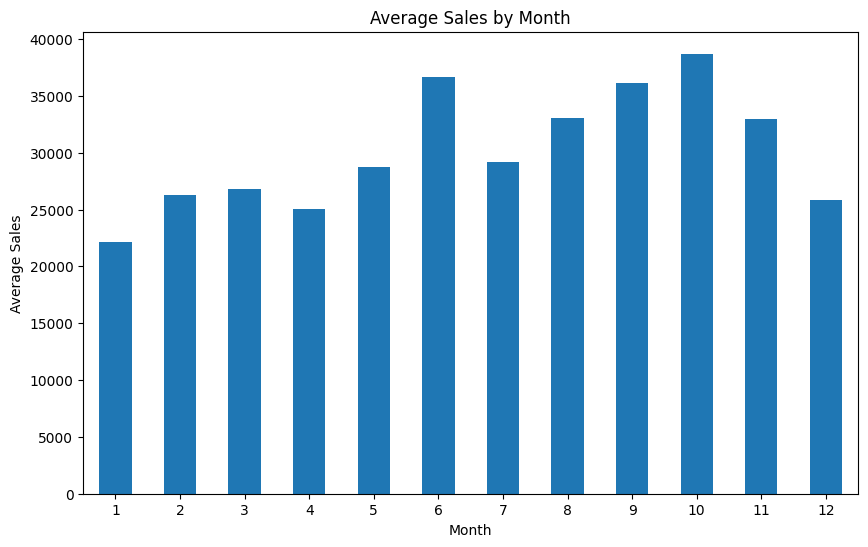

In [30]:
# Check for seasonality

# Convert the 'date' column to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Set the 'date' column as the index
sales_data.set_index('date', inplace=True)
sales_data['Month'] = sales_data.index.month

# Calculate the average sales by month
monthly_sales = sales_data.groupby('Month')['Sales'].mean()

# Plot the average sales by month to check for seasonality
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

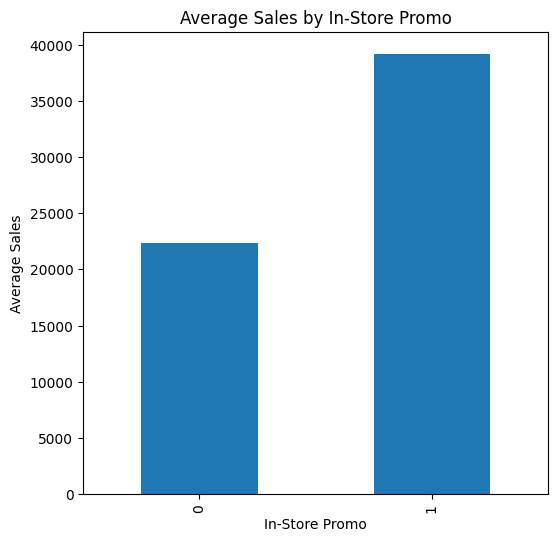

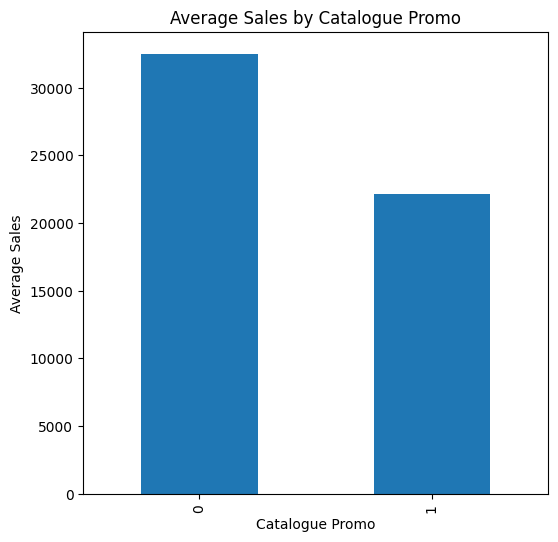

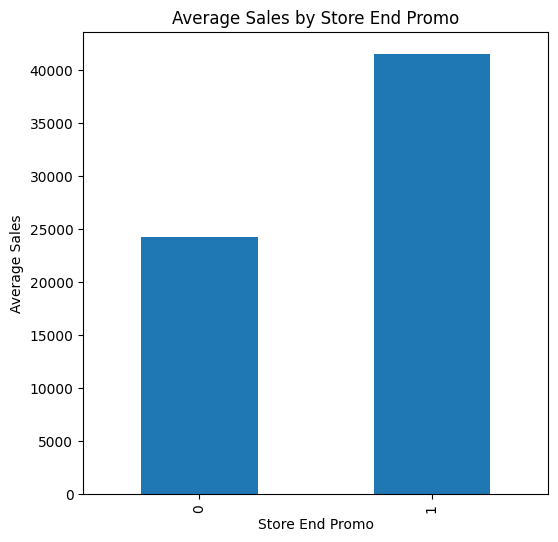

In [23]:
# Group-by analysis for different types of promotions
promotion_types = ['In-Store Promo', 'Catalogue Promo', 'Store End Promo']
for promo in promotion_types:
    plt.figure(figsize=(6, 6))
    sales_data.groupby(promo)['Sales'].mean().plot(kind='bar')
    plt.title(f'Average Sales by {promo}')
    plt.xlabel(promo)
    plt.ylabel('Average Sales')
    plt.show()

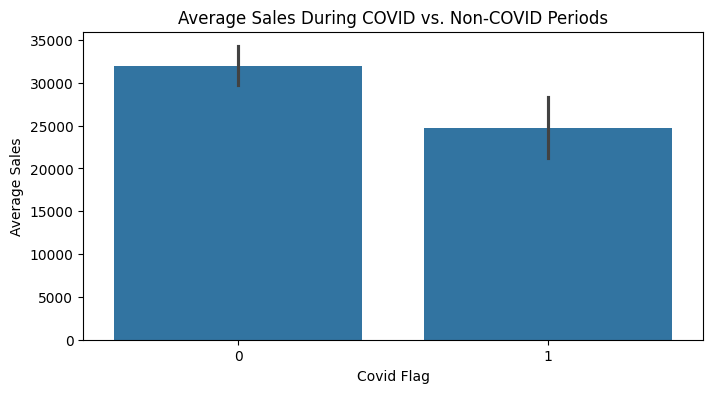

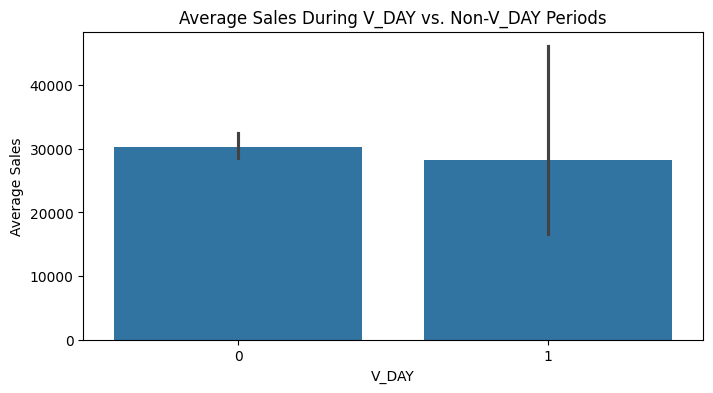

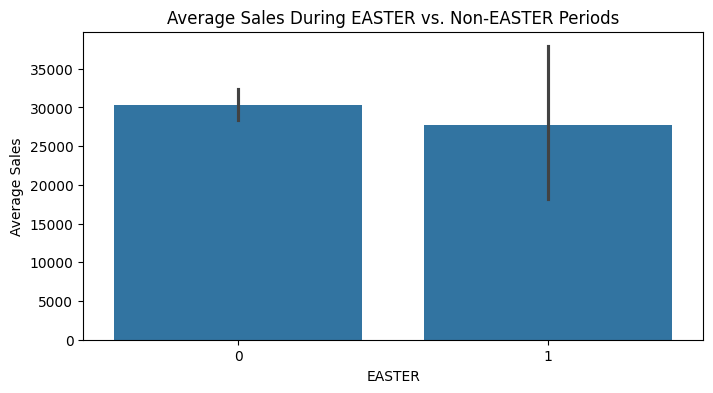

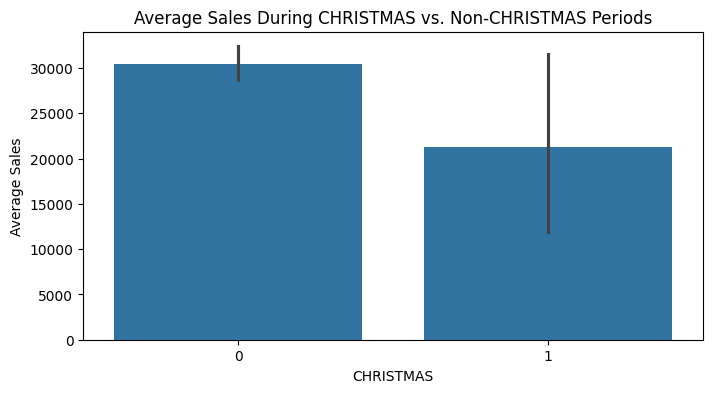

In [39]:
# Plot Sales during COVID and non-COVID periods
plt.figure(figsize=(8, 4))
sns.barplot(x='Covid_Flag', y='Sales', data=sales_data, estimator=np.mean)
plt.title('Average Sales During COVID vs. Non-COVID Periods')
plt.xlabel('Covid Flag')
plt.ylabel('Average Sales')
plt.show()

# Holiday Effect Analysis
holiday_columns = ['V_DAY', 'EASTER', 'CHRISTMAS']
for holiday in holiday_columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=holiday, y='Sales', data=sales_data, estimator=np.mean)
    plt.title(f'Average Sales During {holiday} vs. Non-{holiday} Periods')
    plt.xlabel(holiday)
    plt.ylabel('Average Sales')
    plt.show()


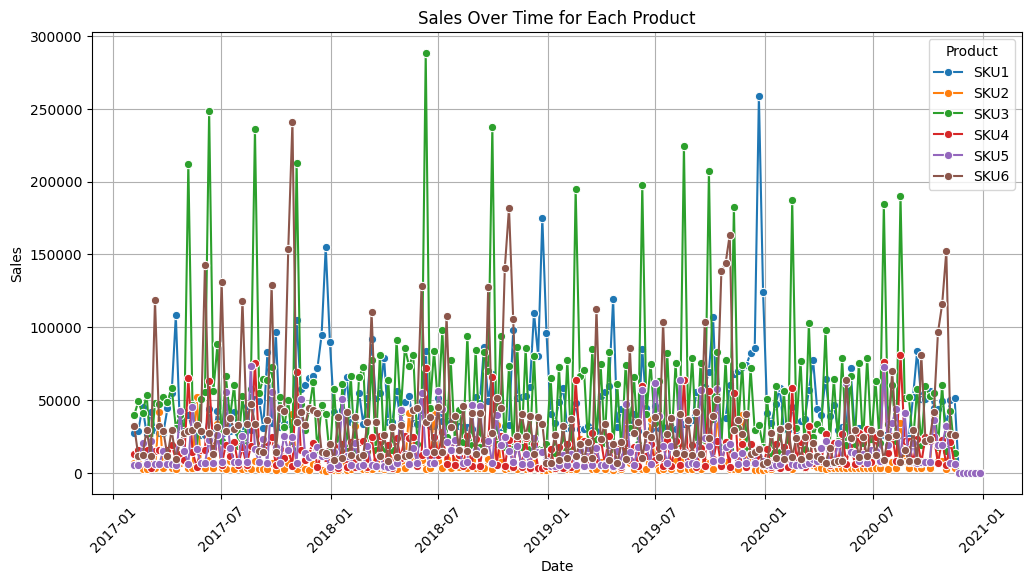

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Sales', hue='Product', data=sales_data, marker='o')
plt.title('Sales Over Time for Each Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

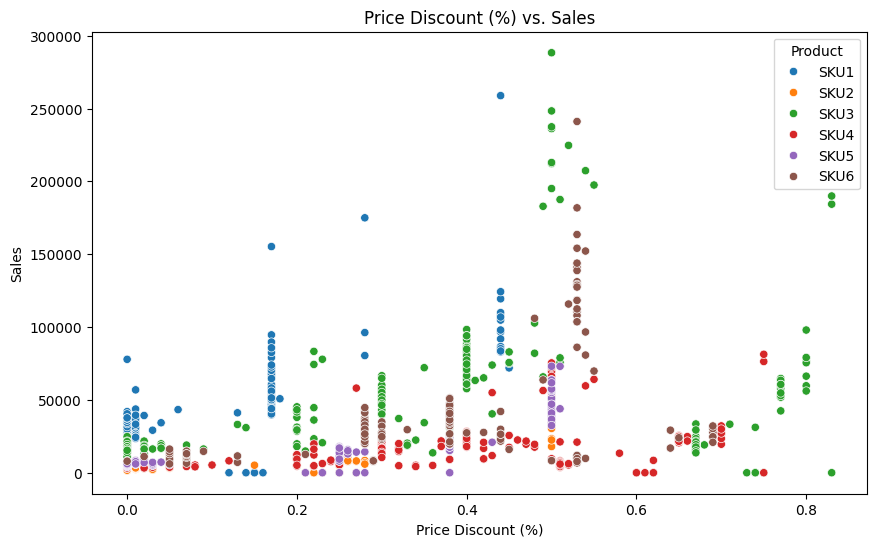

Correlation between Price Discount (%) and Sales: 0.40


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Discount (%)', y='Sales', data=sales_data, hue='Product')
plt.title('Price Discount (%) vs. Sales')
plt.xlabel('Price Discount (%)')
plt.ylabel('Sales')
plt.show()

# Calculate correlation between Price Discount and Sales
correlation = sales_data[['Price Discount (%)', 'Sales']].corr().iloc[0, 1]
print(f'Correlation between Price Discount (%) and Sales: {correlation:.2f}')


<ipython-input-40-209157e4eca4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data.index.month


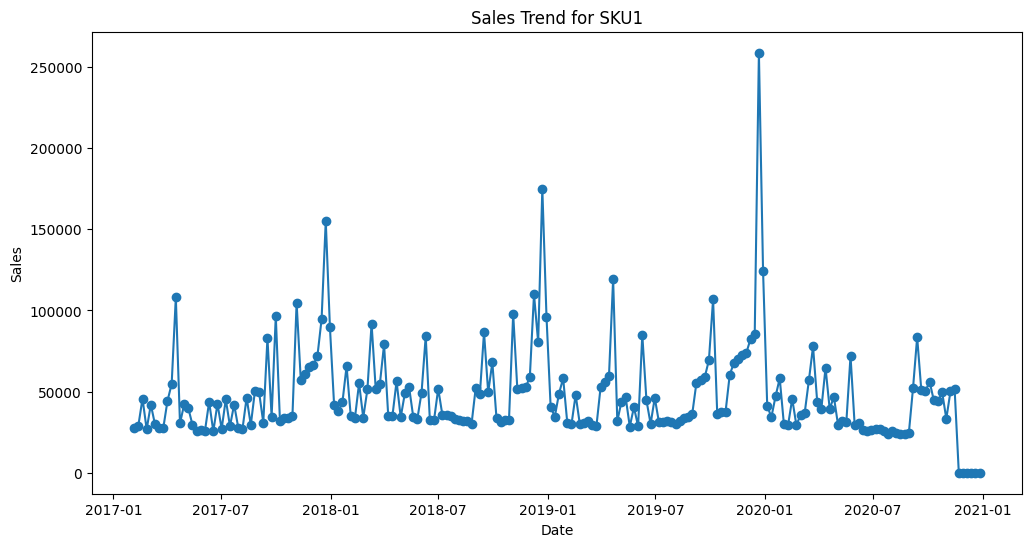

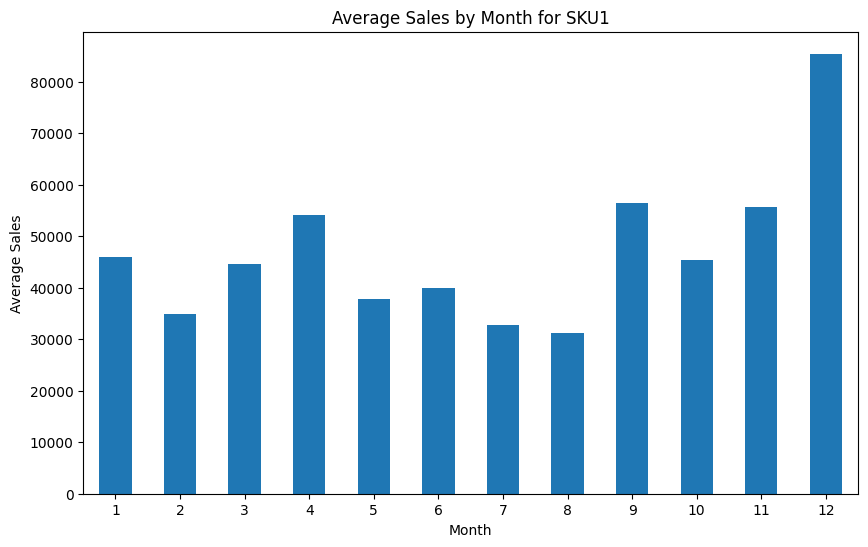

<ipython-input-40-209157e4eca4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data.index.month


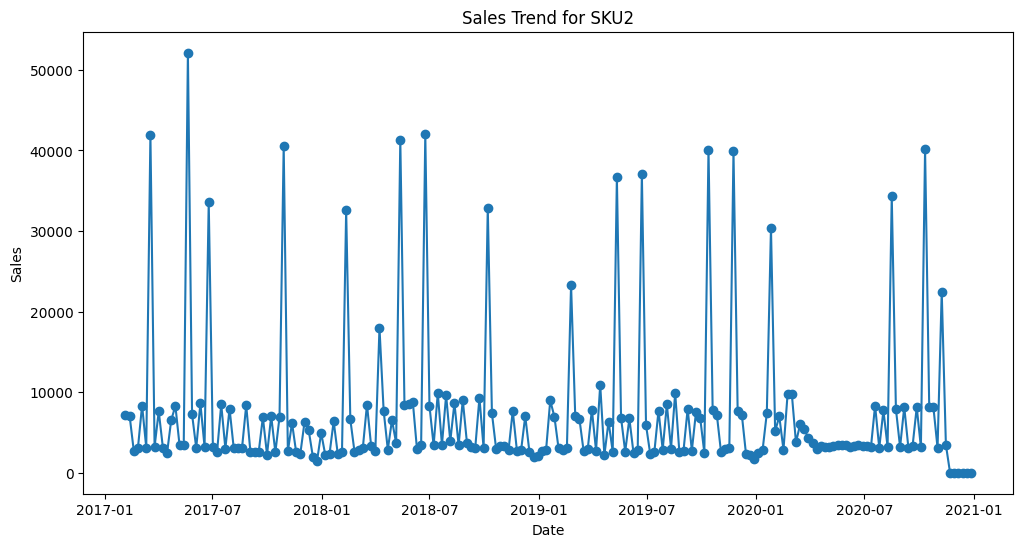

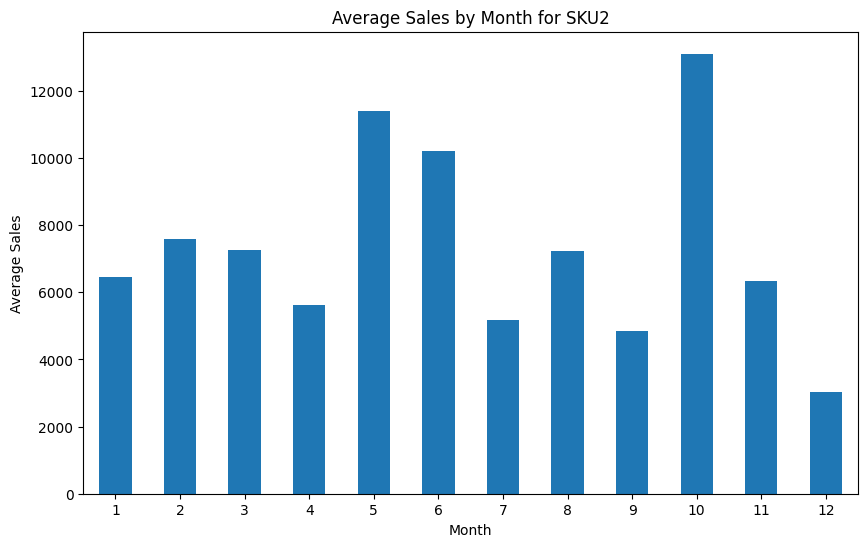

<ipython-input-40-209157e4eca4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data.index.month


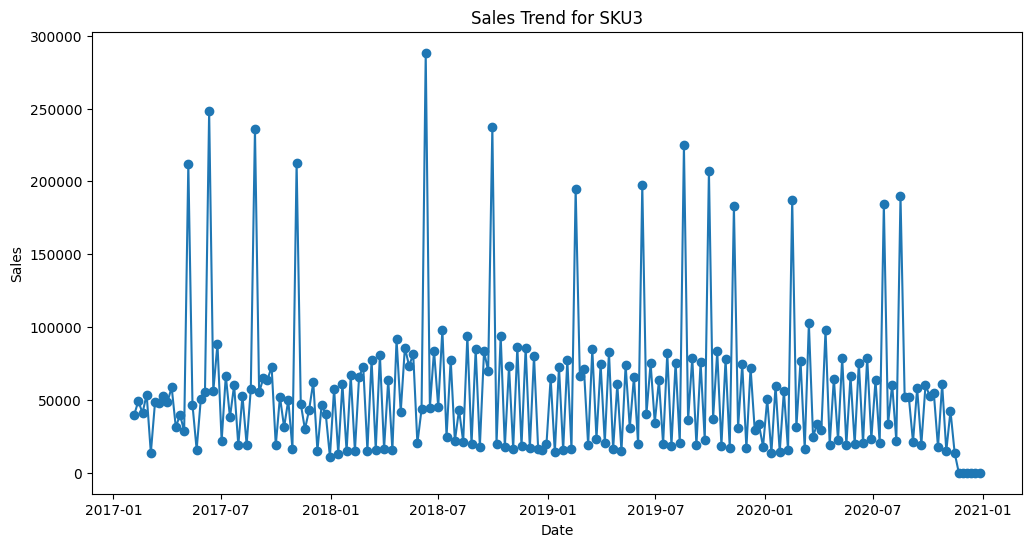

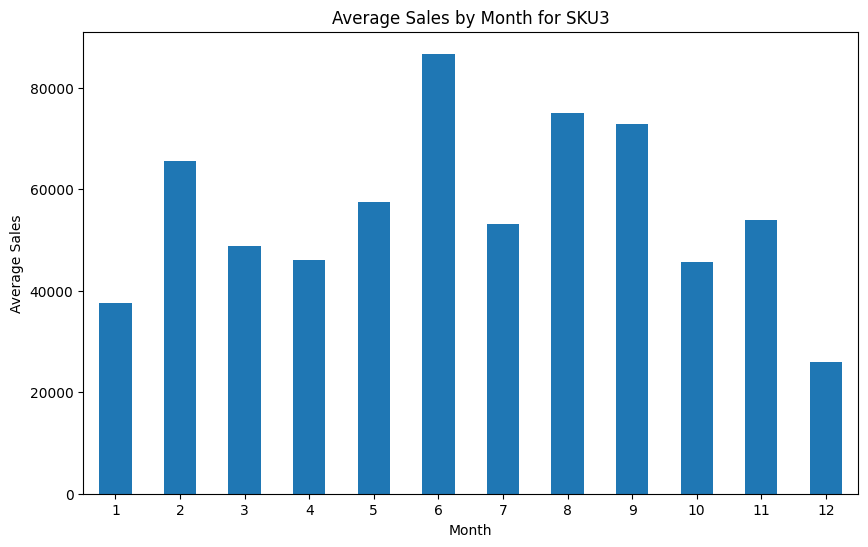

<ipython-input-40-209157e4eca4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data.index.month


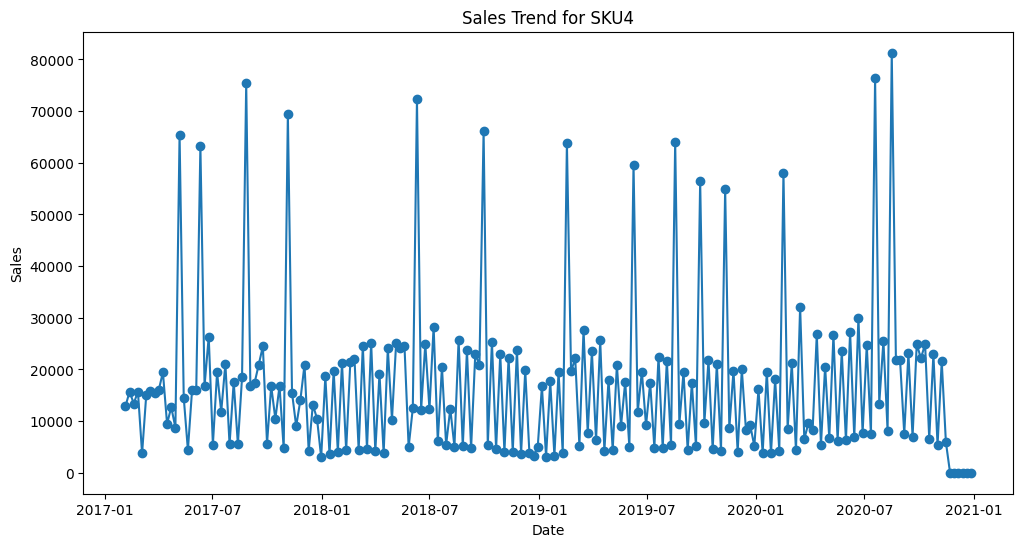

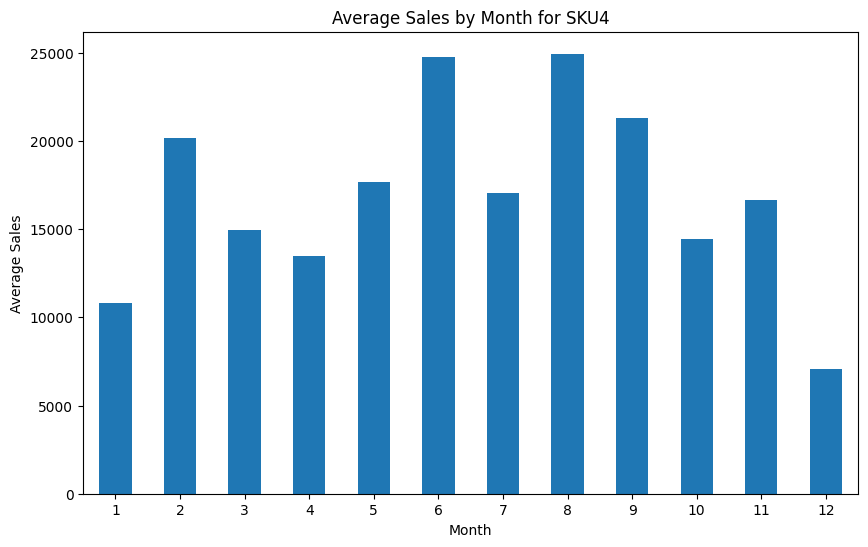

<ipython-input-40-209157e4eca4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data.index.month


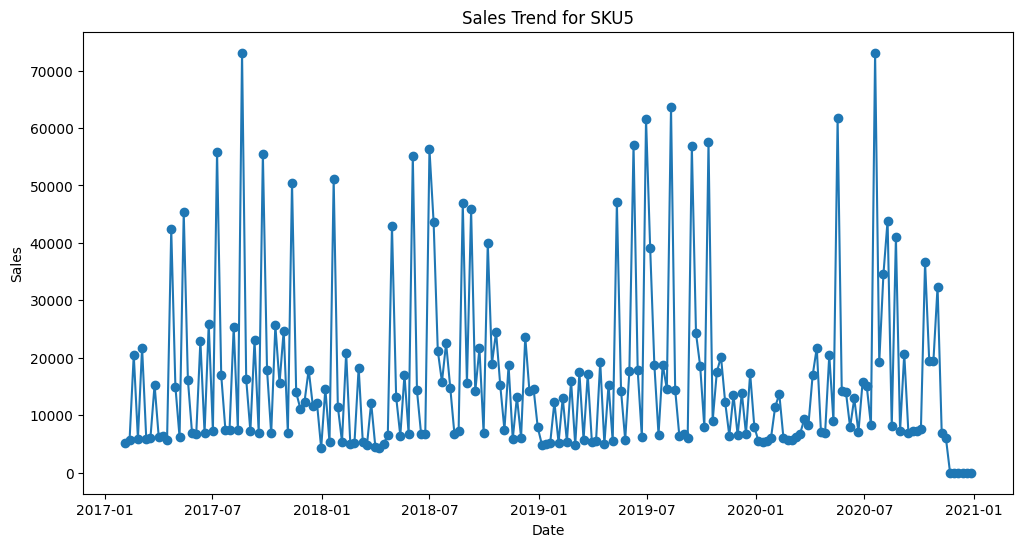

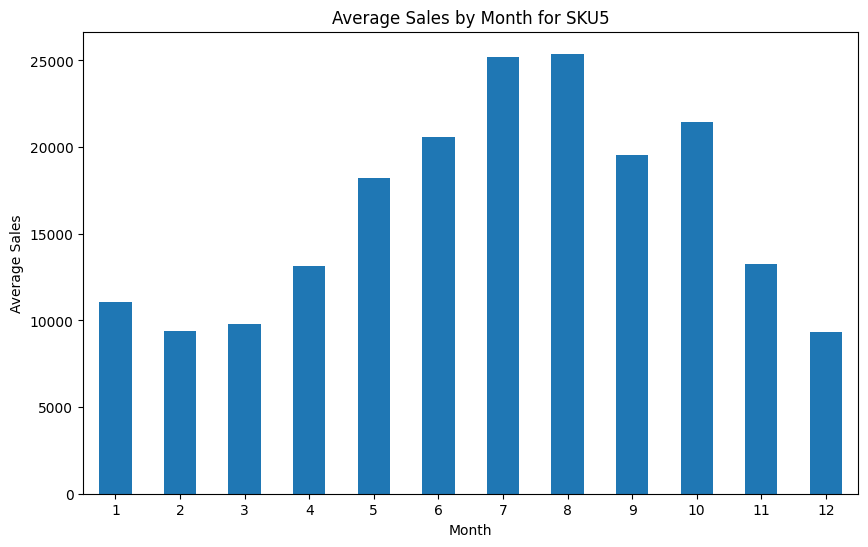

<ipython-input-40-209157e4eca4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data.index.month


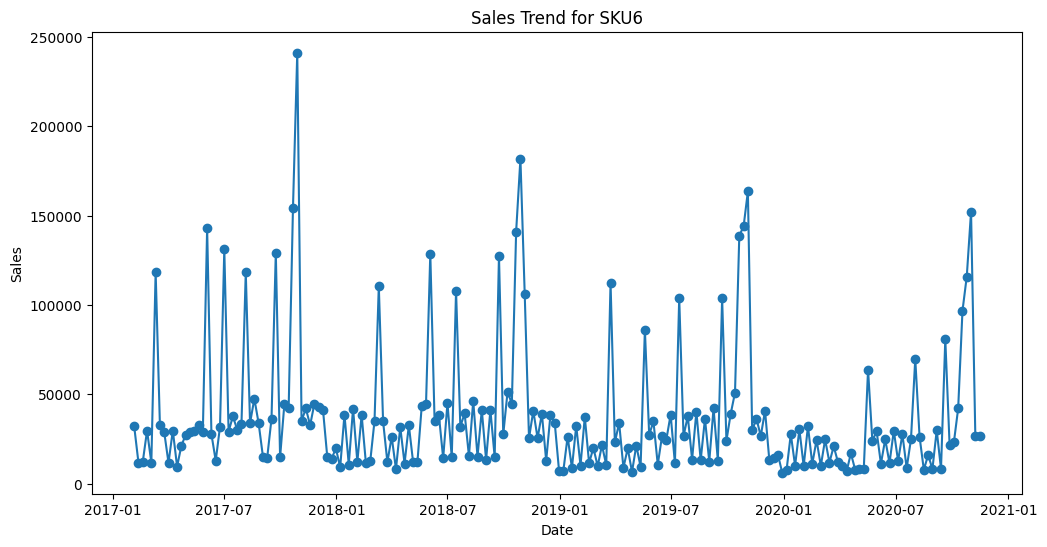

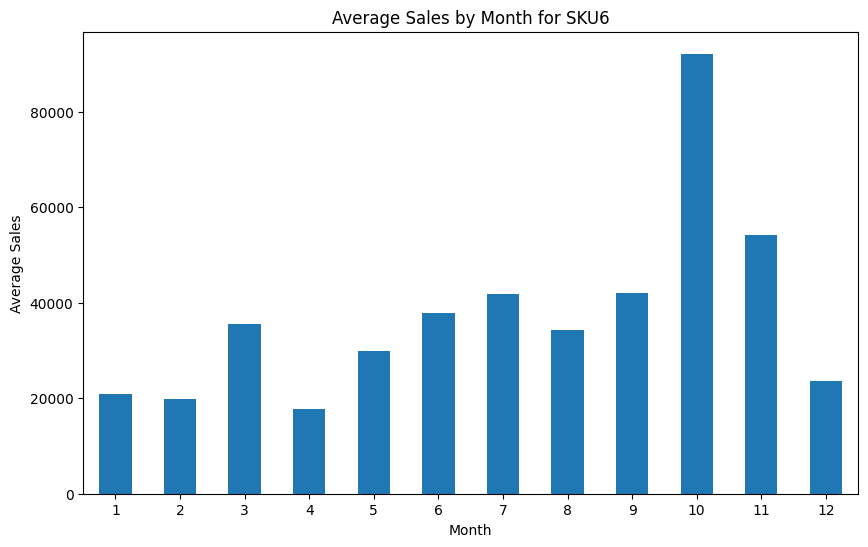

In [40]:
# Analyze each product separately
products = sales_data['Product'].unique()

for product in products:
    # Filter data for the current product
    product_data = sales_data[sales_data['Product'] == product]

    # Extract the month to analyze seasonality
    product_data['Month'] = product_data.index.month

    # Plot sales trend
    plt.figure(figsize=(12, 6))
    plt.plot(product_data.index, product_data['Sales'], marker='o')
    plt.title(f'Sales Trend for {product}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

    # Average sales by month to check seasonality
    monthly_sales = product_data.groupby('Month')['Sales'].mean()

    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='bar')
    plt.title(f'Average Sales by Month for {product}')
    plt.xlabel('Month')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=0)
    plt.show()


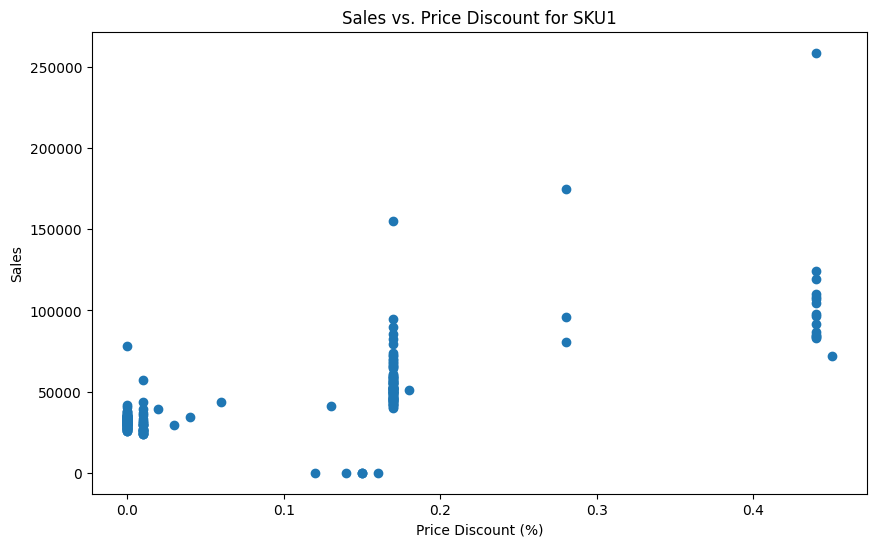

Effectiveness of Promotions for SKU1:
   In-Store Promo  Catalogue Promo  Store End Promo         Sales
0               0                0                0  43100.510000
1               0                1                0  57066.333333
2               0                1                1  88608.111111
3               1                0                0  57712.880952
4               1                0                1  37486.500000


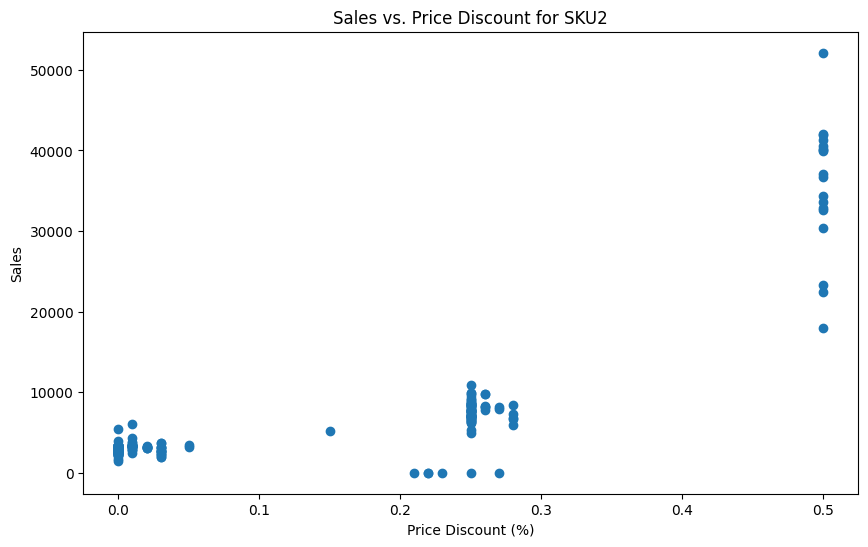

Effectiveness of Promotions for SKU2:
   In-Store Promo  Catalogue Promo  Store End Promo         Sales
0               0                0                0   6071.008696
1               0                1                0   3692.777778
2               0                1                1   4146.875000
3               1                0                0  11118.338710
4               1                0                1   3004.000000


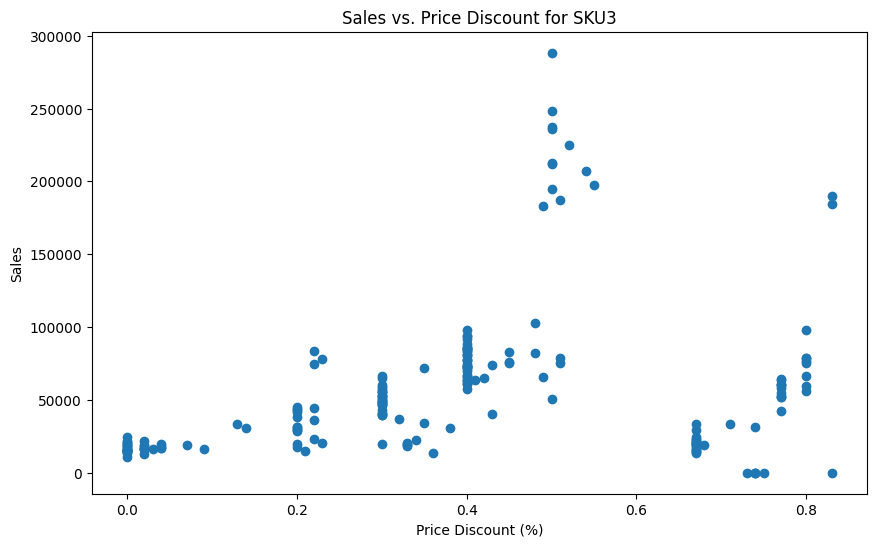

Effectiveness of Promotions for SKU3:
   In-Store Promo  Catalogue Promo  Store End Promo         Sales
0               0                0                0  44535.714286
1               0                1                0  20878.852941
2               0                1                1  32135.387097
3               1                0                0  51375.181818
4               1                0                1  77544.161616


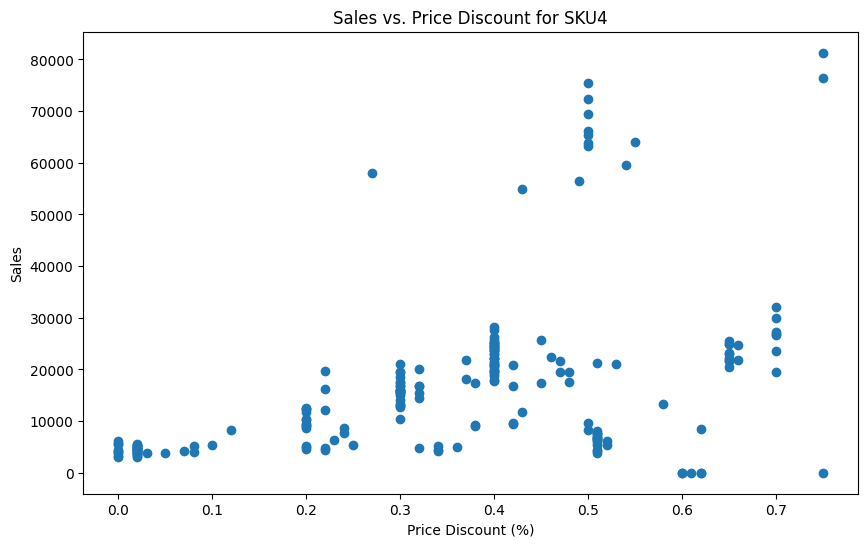

Effectiveness of Promotions for SKU4:
   In-Store Promo  Catalogue Promo  Store End Promo         Sales
0               0                0                0  14266.857143
1               0                1                0   5850.117647
2               0                1                1   9640.161290
3               1                0                0  16528.000000
4               1                0                1  23436.060606


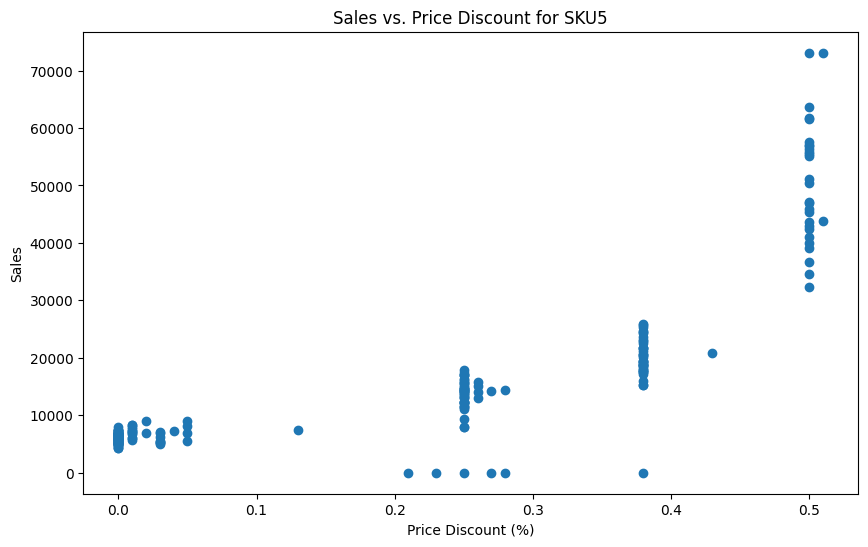

Effectiveness of Promotions for SKU5:
   In-Store Promo  Catalogue Promo  Store End Promo         Sales
0               0                0                0  14434.752809
1               0                1                0  15540.578947
2               0                1                1   9331.750000
3               1                0                0  20464.972973
4               1                0                1  19401.500000


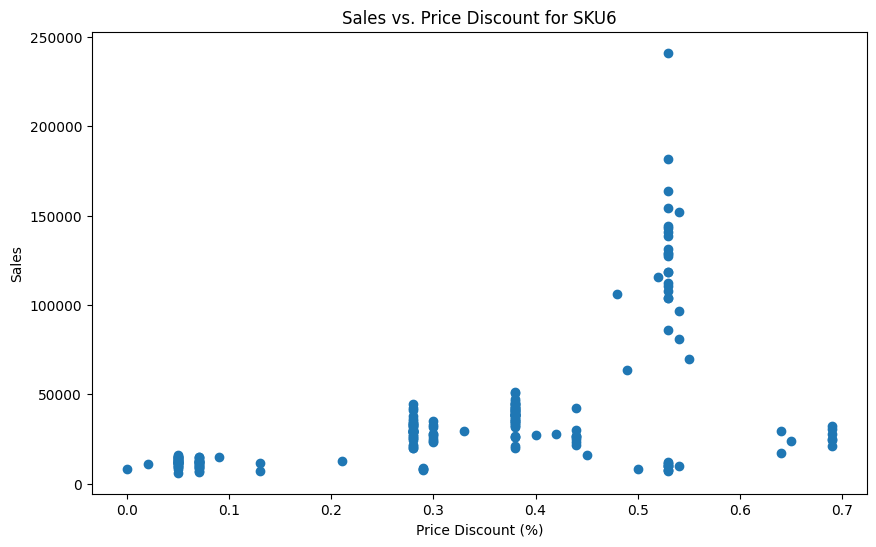

Effectiveness of Promotions for SKU6:
   In-Store Promo  Catalogue Promo  Store End Promo         Sales
0               0                0                0  28977.727273
1               0                1                0  32770.481481
2               0                1                1  34315.217391
3               1                0                0  45119.666667
4               1                0                1  48818.327586


In [42]:
for product in products:
    # Filter data for the current product
    product_data = sales_data[sales_data['Product'] == product]

    # Analyze the impact of Price Discount on Sales
    plt.figure(figsize=(10, 6))
    plt.scatter(product_data['Price Discount (%)'], product_data['Sales'])
    plt.title(f'Sales vs. Price Discount for {product}')
    plt.xlabel('Price Discount (%)')
    plt.ylabel('Sales')
    plt.show()

    # Group by promotion types and calculate average sales
    promo_effect = product_data.groupby(['In-Store Promo', 'Catalogue Promo', 'Store End Promo'])['Sales'].mean().reset_index()

    # Print the result
    print(f"Effectiveness of Promotions for {product}:")
    print(promo_effect)


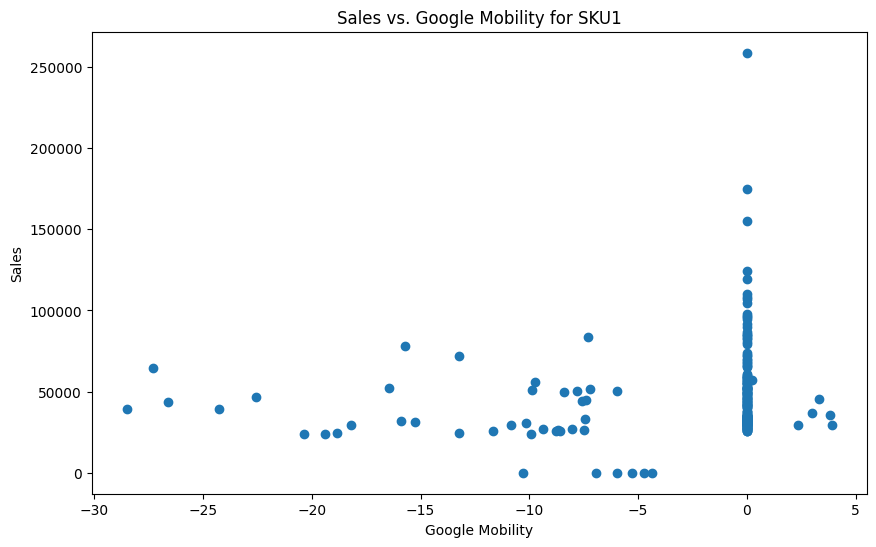

Impact of COVID on Sales for SKU1:
Covid_Flag
0    51303.783439
1    34888.808511
Name: Sales, dtype: float64
Impact of Holidays on Sales for SKU1:
   V_DAY  EASTER  CHRISTMAS         Sales
0      0       0          0  47639.276042
1      0       0          1  49831.500000
2      0       1          0  52583.750000
3      1       0          0  34516.500000


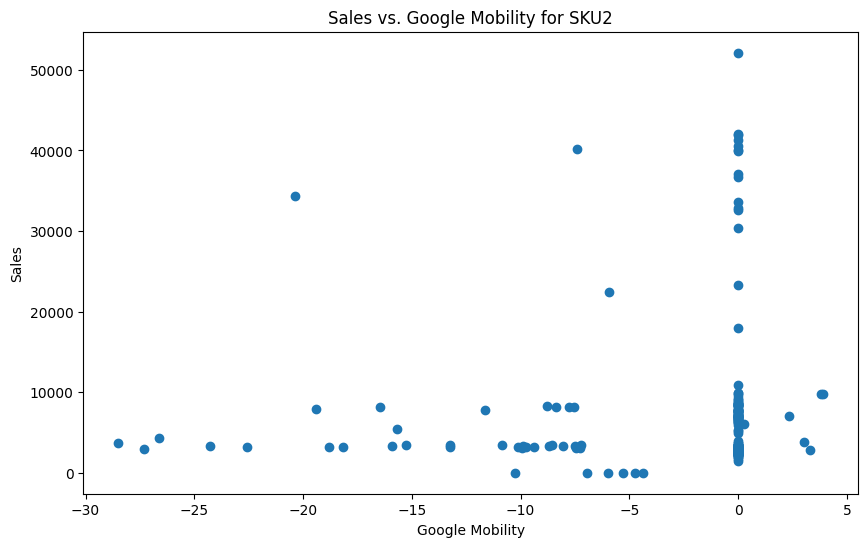

Impact of COVID on Sales for SKU2:
Covid_Flag
0    7724.254777
1    5903.063830
Name: Sales, dtype: float64
Impact of Holidays on Sales for SKU2:
   V_DAY  EASTER  CHRISTMAS         Sales
0      0       0          0   7298.807292
1      0       0          1   4185.250000
2      0       1          0   6679.250000
3      1       0          0  11330.750000


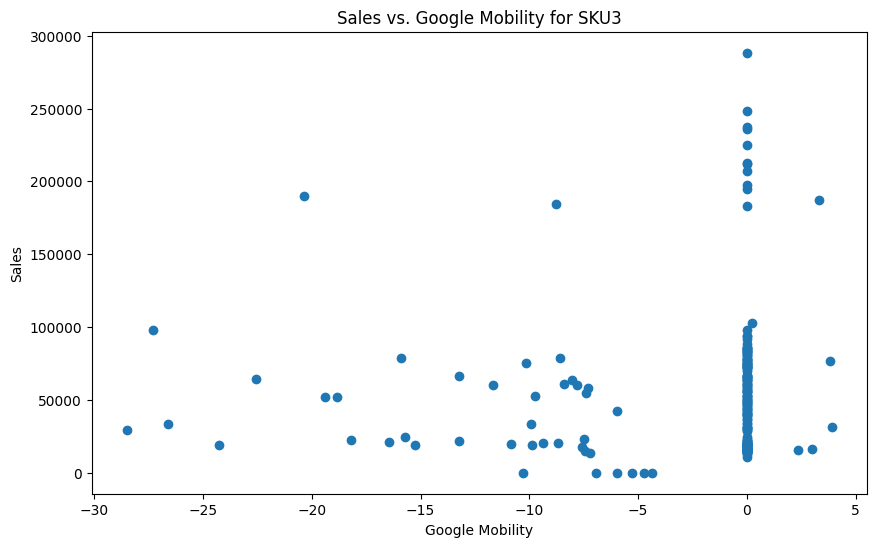

Impact of COVID on Sales for SKU3:
Covid_Flag
0    58557.707006
1    46734.489362
Name: Sales, dtype: float64
Impact of Holidays on Sales for SKU3:
   V_DAY  EASTER  CHRISTMAS         Sales
0      0       0          0  56175.026042
1      0       0          1  23928.250000
2      0       1          0  60254.750000
3      1       0          0  66936.000000


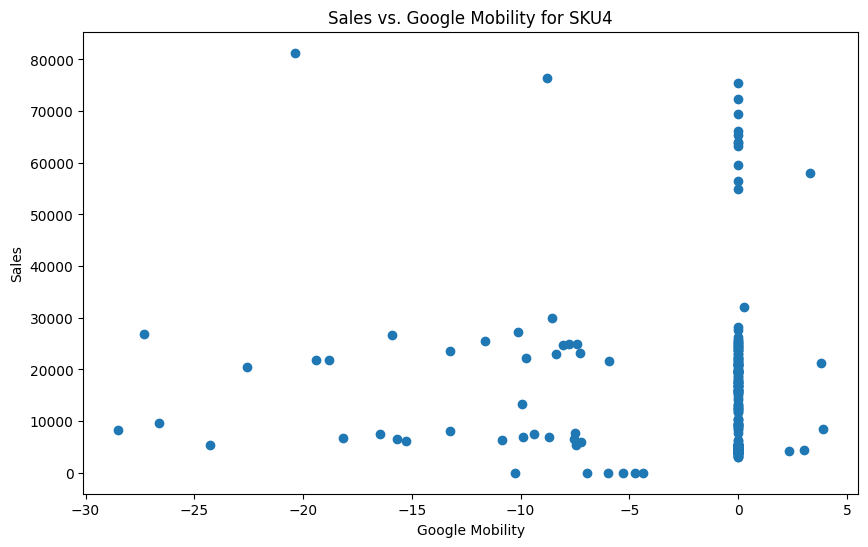

Impact of COVID on Sales for SKU4:
Covid_Flag
0    16970.305732
1    16997.297872
Name: Sales, dtype: float64
Impact of Holidays on Sales for SKU4:
   V_DAY  EASTER  CHRISTMAS         Sales
0      0       0          0  17088.104167
1      0       0          1   7172.250000
2      0       1          0  17928.750000
3      1       0          0  20472.750000


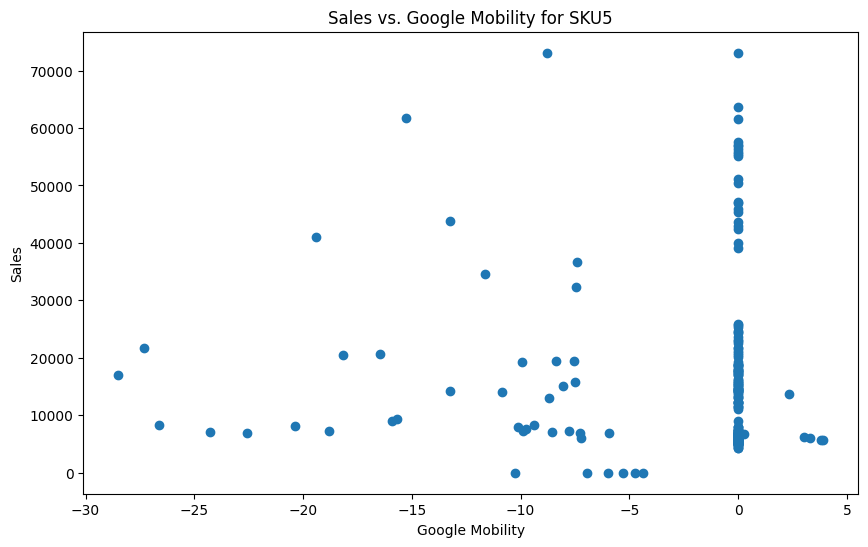

Impact of COVID on Sales for SKU5:
Covid_Flag
0    16952.770701
1    14861.787234
Name: Sales, dtype: float64
Impact of Holidays on Sales for SKU5:
   V_DAY  EASTER  CHRISTMAS         Sales
0      0       0          0  16934.666667
1      0       0          1   6243.500000
2      0       1          0   9487.000000
3      1       0          0  11427.750000


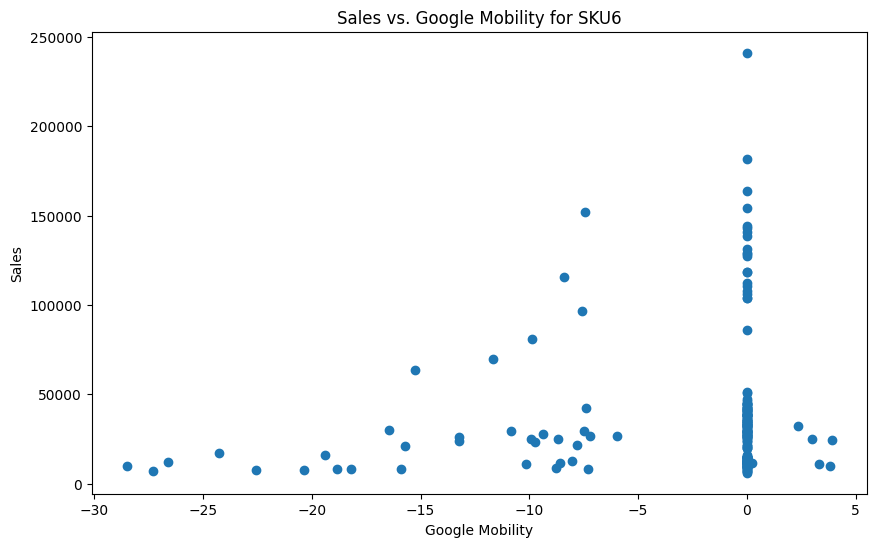

Impact of COVID on Sales for SKU6:
Covid_Flag
0    39991.165605
1    29812.317073
Name: Sales, dtype: float64
Impact of Holidays on Sales for SKU6:
   V_DAY  EASTER  CHRISTMAS         Sales
0      0       0          0  38509.716578
1      0       0          1  40941.333333
2      0       1          0  19621.000000
3      1       0          0  24573.250000


In [43]:
for product in products:
    # Filter data for the current product
    product_data = sales_data[sales_data['Product'] == product]

    # Analyze the impact of Google Mobility on Sales
    plt.figure(figsize=(10, 6))
    plt.scatter(product_data['Google_Mobility'], product_data['Sales'])
    plt.title(f'Sales vs. Google Mobility for {product}')
    plt.xlabel('Google Mobility')
    plt.ylabel('Sales')
    plt.show()

    # Impact of COVID periods on Sales
    covid_effect = product_data.groupby('Covid_Flag')['Sales'].mean()
    print(f"Impact of COVID on Sales for {product}:")
    print(covid_effect)

    # Impact of Holidays on Sales
    holiday_effect = product_data.groupby(['V_DAY', 'EASTER', 'CHRISTMAS'])['Sales'].mean().reset_index()
    print(f"Impact of Holidays on Sales for {product}:")
    print(holiday_effect)
